In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
#from __future__ import print_function

## Bayesian A/B Testing

This is just an illustartion of how this method can effectively deal with mid-size datasets to draw trustworthy conclusions about the relative merits of treatment A and treatment B.

I'm just going to reproduce the results of one of the clinical trials listed in the IBA clinical Reference list that Bob passed on, show how this method very easy gives the same results.
Then I am going to do the same kind of analysis for the 2015 major league baseball season, where treatment A is the american league, treatment b is the national league, and we are measuring which league is **better** at hitting home runs.
I'm just doing this so you can get calibrate the meaning of the results of the clinical study, which essentially yields the same numbers as the baseball result.

The baseball exmaple we already know before hand that the american league is much much better at hitting home runs because the pitcher does not bat. So the difference between proton and photon therapy in this one study is on par with that between american league and national league home run production, which is **huge**.

I wont get down in the weeds right now; I just want to illustrate that we can start doing this kind of analysis right away by looking at the published literature. The analysis of each study that publishes the relevant counts takes no time at all.

I'll first do the baseball example, which I'm guessing will make some intuitive sense to Bob.

The data is found here: http://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=0&type=8&season=2015&month=0&season1=2015&ind=0&team=0,ts&players=0

You would expect the American League to be demonstrably different because of the designated hitter.

AL : 2634 HR in 91837 PA


NL : 2275 HR in 91790 PA

In [2]:
from scipy.stats import beta

In [3]:
AL_PA = 91837
NL_PA = 91790

AL_HR = 2634
NL_HR = 2275

from scipy.stats import beta
alpha_prior = 1
beta_prior = 1

posterior_AL = beta(alpha_prior + AL_HR, beta_prior + AL_PA - AL_HR)

posterior_NL = beta(alpha_prior + NL_HR, beta_prior + NL_PA - NL_HR)


samples = 200000

samples_posterior_AL = posterior_AL.rvs(samples)

samples_posterior_NL = posterior_NL.rvs(samples)

print (samples_posterior_AL > samples_posterior_NL).mean()

1.0


This means that we are **certain** tha the AL is "better" at hitting home runs then the NL.

(0.02, 0.04)

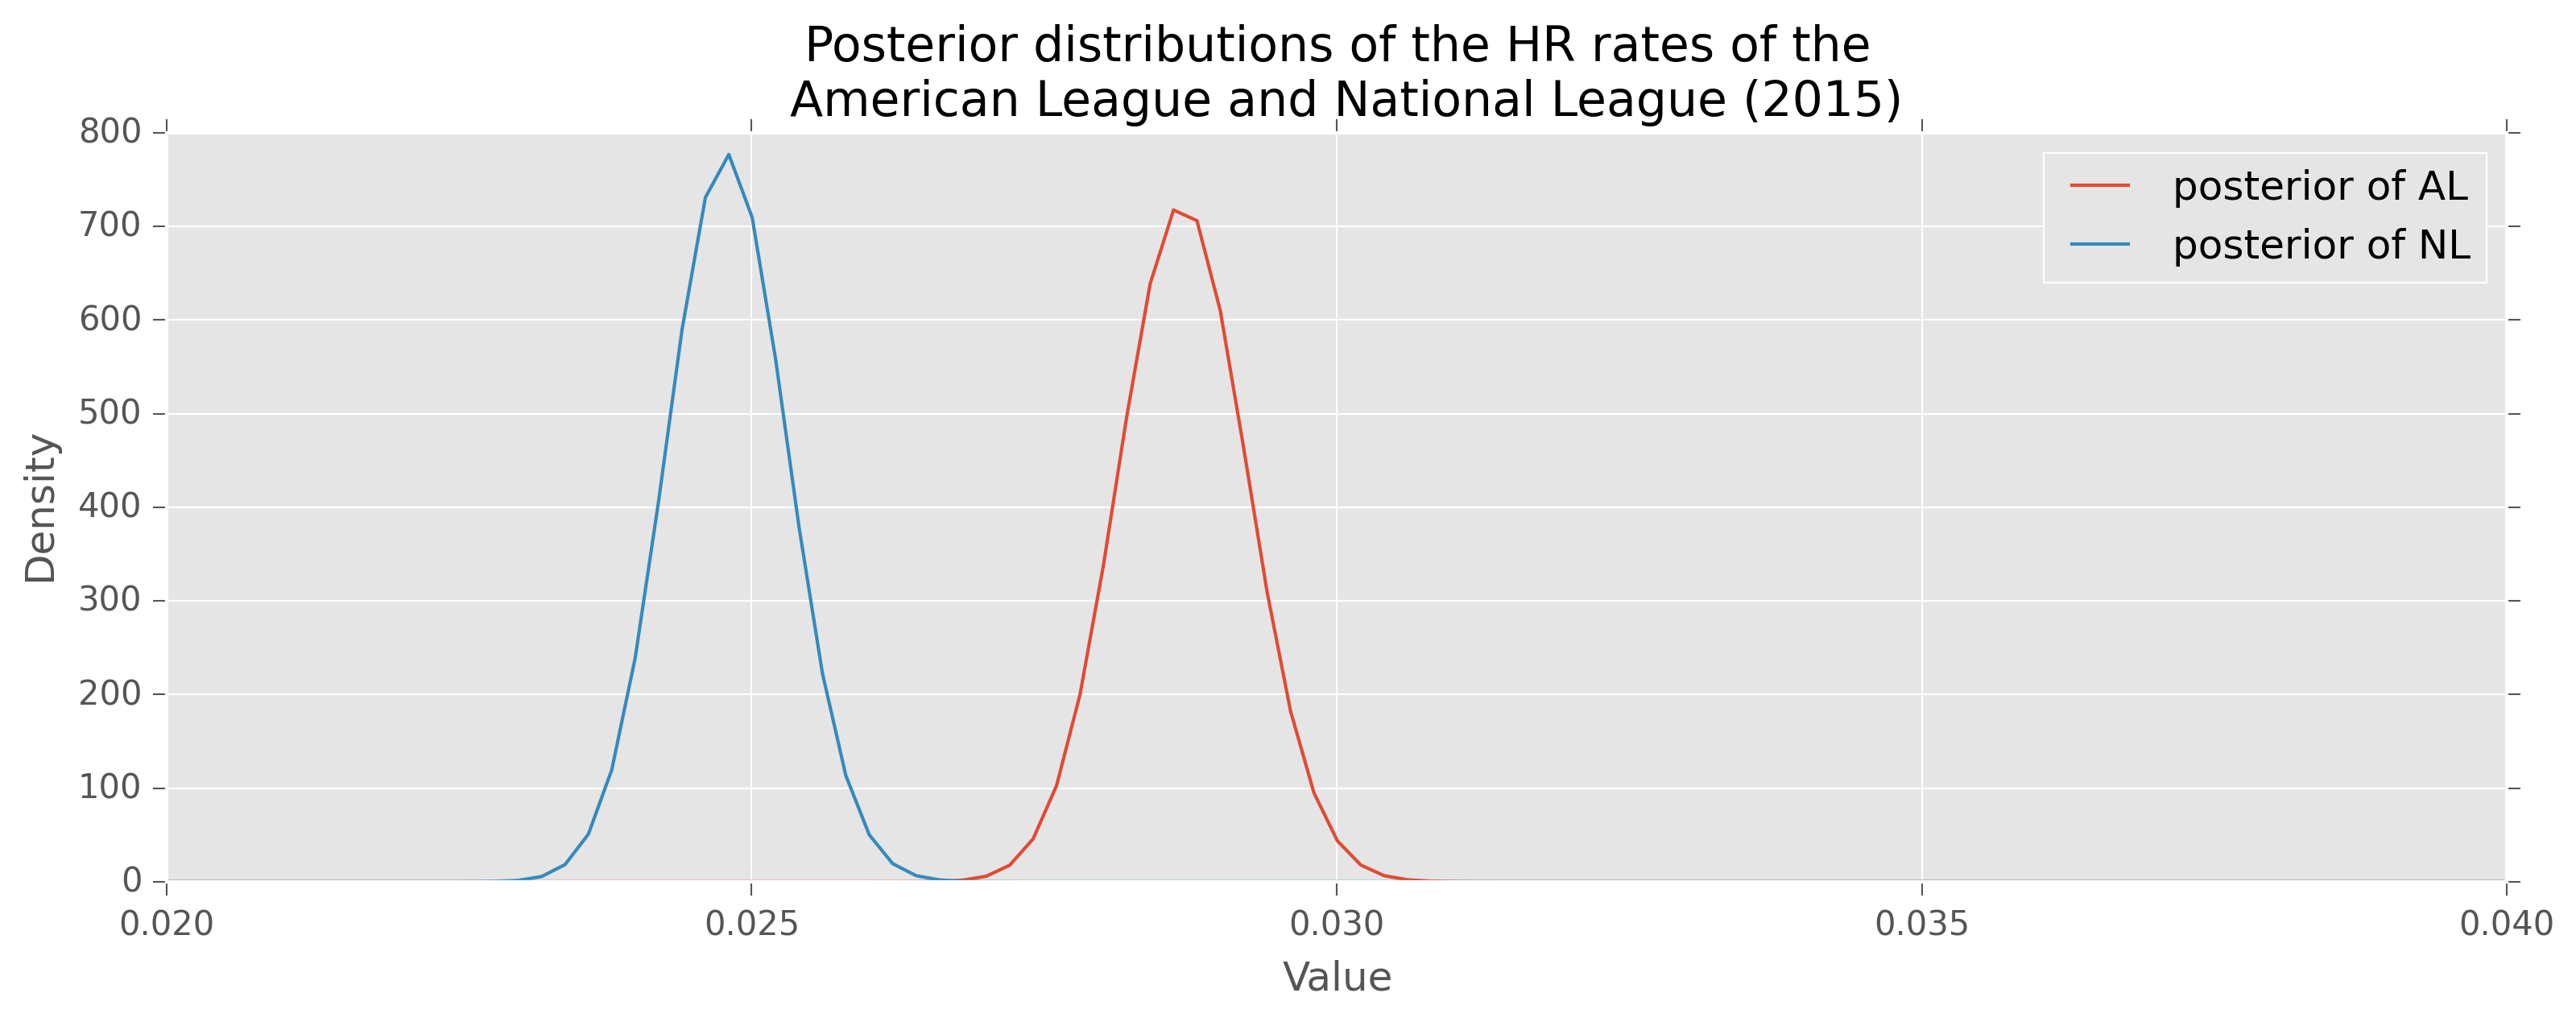

In [4]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
x = np.linspace(0,1, 5000)
plt.plot(x, posterior_AL.pdf(x), label='posterior of AL')
plt.plot(x, posterior_NL.pdf(x), label='posterior of NL')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posterior distributions of the HR rates of the \n American League and National League (2015)")
plt.legend()
plt.xlim(0.02,0.04)

This plot just shows that the probablity of an AL batter hitting a home run at any time is around 2.8%, and a NL batter's is around 2.5%   . Just like if you roll a dice a dozen times, you are not likely to roll a 1 two times, having little data means what we observe is not necessarily the true probability. This method takes the observed data and finds ranges for the "true probability".

(array([  4.27998133e-03,   6.41997200e-03,   3.20998600e-03,
          2.03299113e-02,   3.95898273e-02,   4.38698086e-02,
          9.52295846e-02,   1.76549230e-01,   2.43958936e-01,
          3.06018665e-01,   5.05037797e-01,   7.45786747e-01,
          1.08497527e+00,   1.46696360e+00,   2.04797107e+00,
          2.71243817e+00,   3.40472515e+00,   4.26714139e+00,
          5.31894680e+00,   6.27980261e+00,   7.62264675e+00,
          8.47543303e+00,   9.39348903e+00,   1.02238054e+01,
          1.09952720e+01,   1.18769482e+01,   1.21851068e+01,
          1.22300467e+01,   1.20641974e+01,   1.17977685e+01,
          1.10872916e+01,   1.03586248e+01,   9.47694866e+00,
          8.24966402e+00,   7.38403779e+00,   6.38894213e+00,
          5.34355669e+00,   4.56995007e+00,   3.58662436e+00,
          2.97672702e+00,   2.33044983e+00,   1.80294214e+00,
          1.31930425e+00,   9.25545963e-01,   8.00356509e-01,
          5.63887540e-01,   3.65938404e-01,   3.04948670e-01,
        

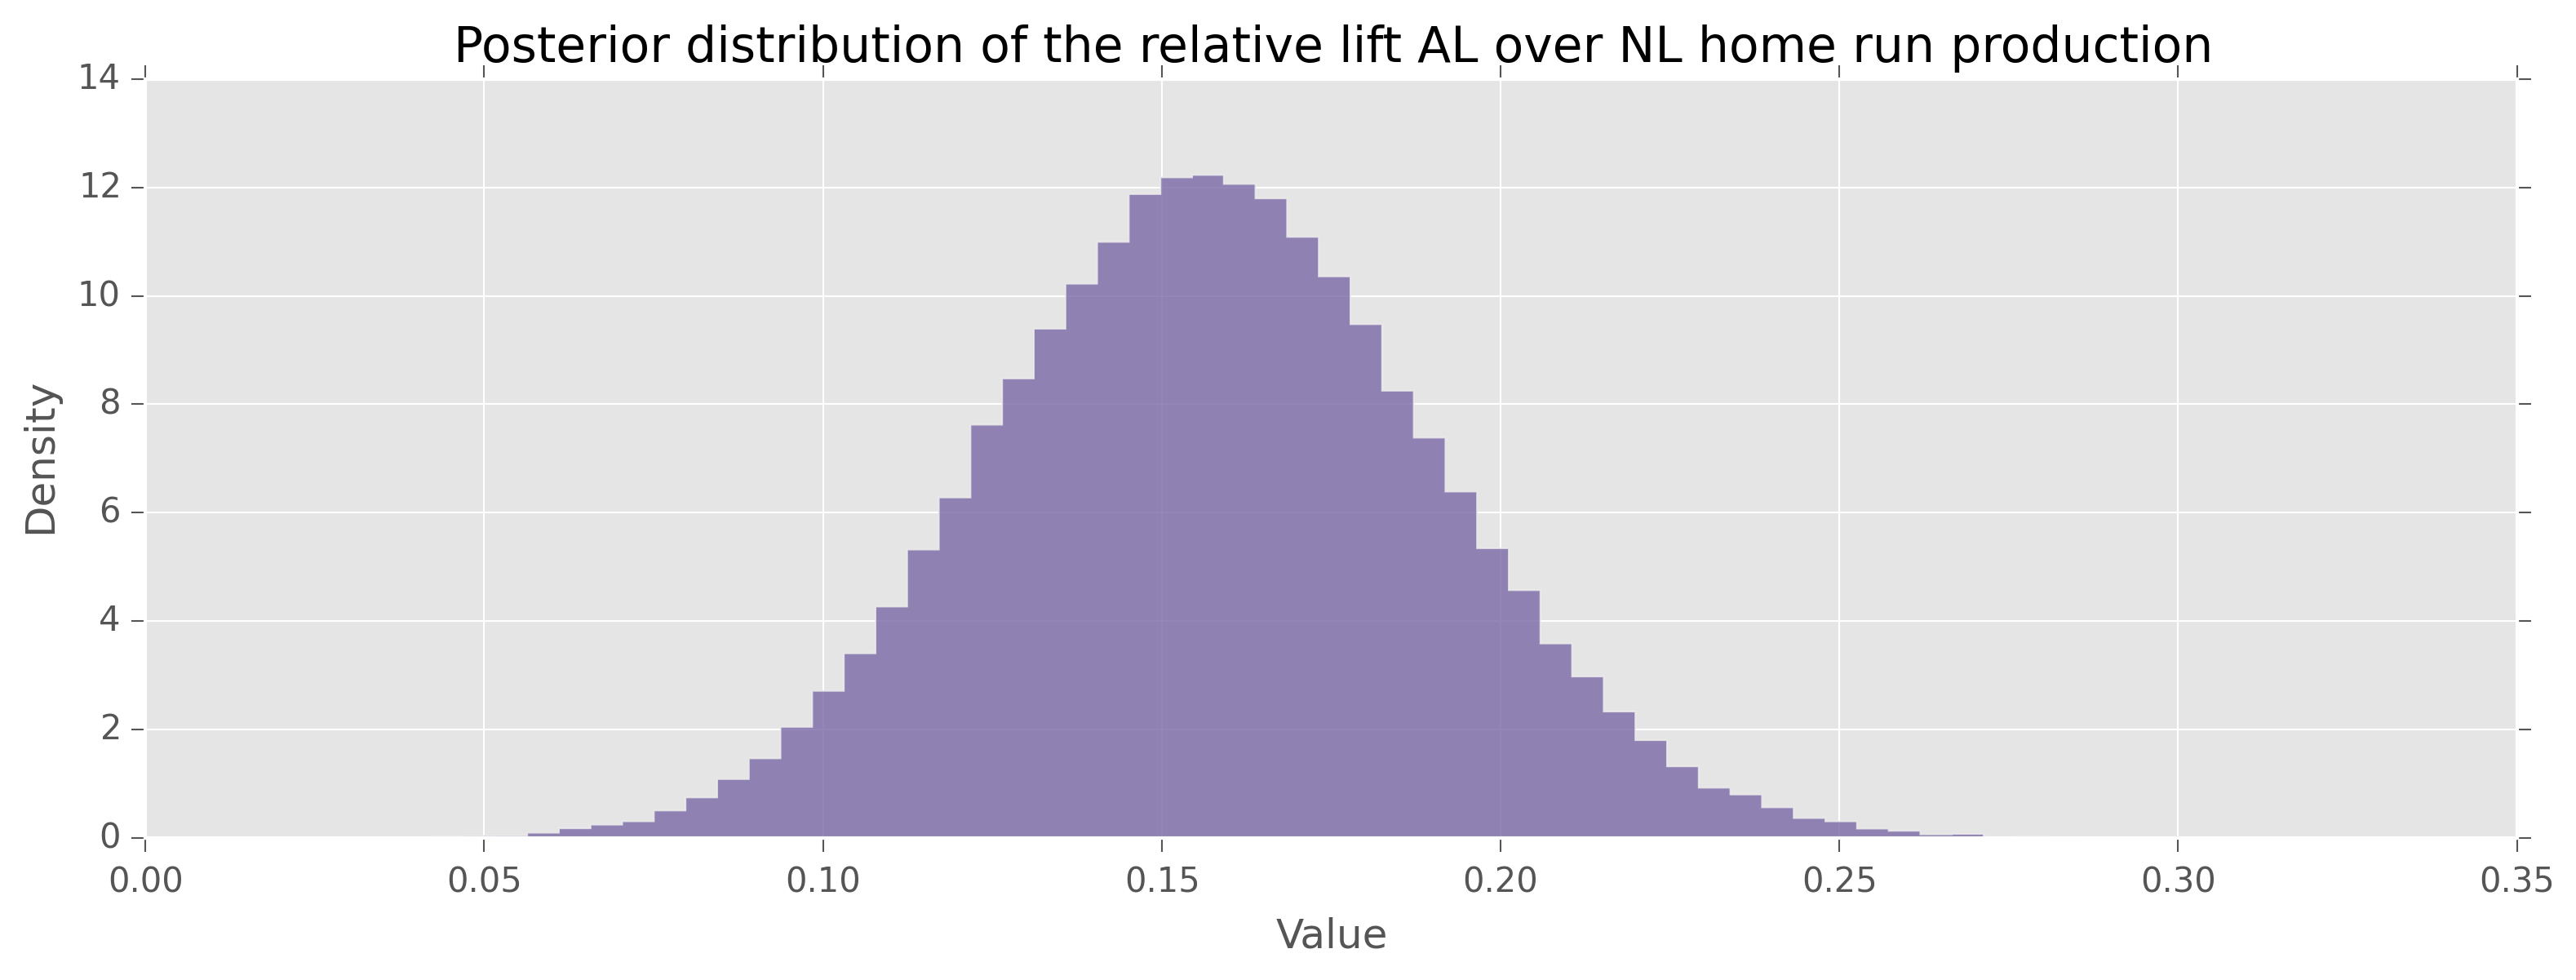

In [5]:
def relative_increase(a,b):
    return (a-b)/b

posterior_rel_increase = relative_increase(samples_posterior_AL,
     samples_posterior_NL)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posterior distribution of the relative lift AL over NL home run production")

plt.hist(posterior_rel_increase,histtype='stepfilled', bins=60, alpha=0.80,
         label = 'relative increase',color='#7A68A6', normed=True)

C:\Users\ddooling\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


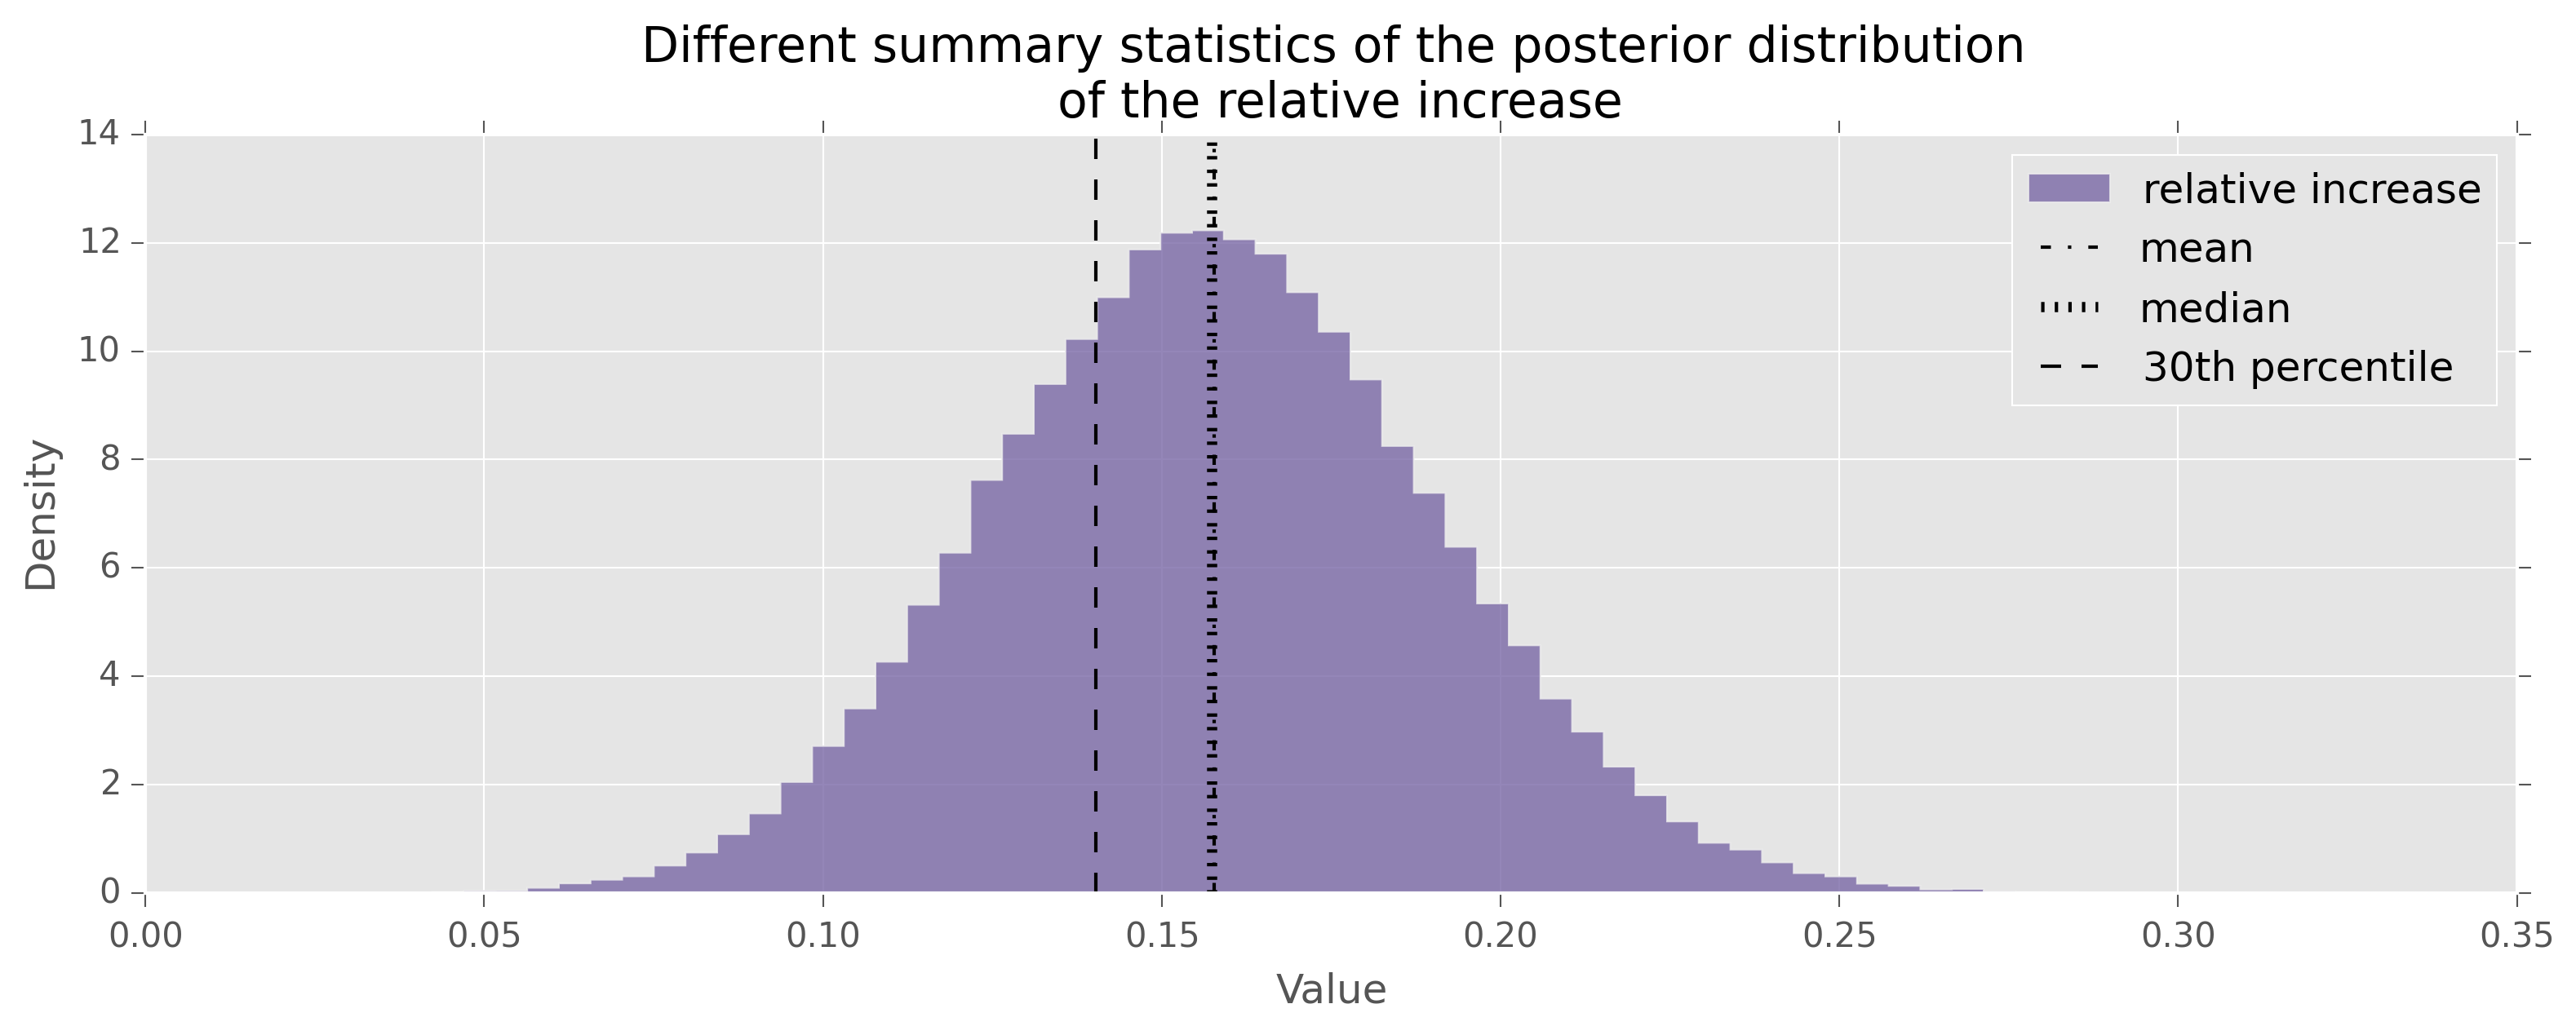

In [6]:
mean = posterior_rel_increase.mean()
median = np.percentile(posterior_rel_increase, 50)
conservative_percentile = np.percentile(posterior_rel_increase, 30)

plt.hist(posterior_rel_increase,histtype='stepfilled', bins=60, alpha=0.80,
         label = 'relative increase',color='#7A68A6', normed=True)


plt.vlines(mean, 0, 14, linestyles='-.', label='mean')
plt.vlines(median, 0, 14, linestyles=':', label='median', lw=3)
plt.vlines(conservative_percentile, 0, 14, linestyles='--',
           label='30th percentile')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Different summary statistics of the posterior distribution \n of the relative increase")

plt.legend();


So the relative increase is about 16%; again the AL is definitely better than the NL at hitting home runs (becuase of the pitchers), but the relative amount of better is only  $\sim 15$%

### Do Bayesian A/B Testing on the Clinical Trial Data in the Literature.


Chung C.S. et al., “Comparative analysis of second malignancy risk in patients treated with Proton Therapy versus conventional Photon Therapy”, Red Journal S0360-3016(08)01001-8, International Journal of Radiation Oncology, Biology, 2008 September 1. Preliminary results here indicate that the use of PT is associated with a significantly lower risk of secondary malignancies compared to RT, even if additional analyses are required given the prolonged latency period for the development of radiation-induced cancers.

http://www.redjournal.org/article/S0360-3016%252808%252901001-8/fulltext

Matched retrospective cohort study of 1,450 patients treated with proton radiation therapy from 1974-2001 at the Harvard Cyclotron in Cambridge, MA, and patients treated with photon therapy in the Surveillance, Epidemiology, and End Results (SEER) cancer registry. We matched patients by age at radiation treatment, year of treatment, cancer histology, and site of treatment. We restricted the study to patients with ≥1 year of follow-up. The primary endpoint was the risk of a second malignancy in any site after radiation therapy.
We matched 503 Harvard Cyclotron proton patients with 1591 photon patients from the SEER registry. 6.4% of proton patients (32 patients) developed a second malignancy, while 12.8% of photon patients (203 patients) developed a second malignancy. The median duration of follow-up was 7.7 years in the proton cohort and 6.1 years in the photon cohort. The median age at treatment was 56 years in the proton cohort and 59 years in the photon cohort. After adjusting for gender and the age at treatment, treatment with photon therapy was significantly associated with an increased risk of a second malignancy (Adjusted Hazard Ratio 2.73, 95% CI 1.87 to 3.98, p < 0.0001).




In [7]:
PROTON_TOTAL = 503
GAMMA_TOTAL = 1591

PROTON_SECOND = 32
GAMMA_SECOND = 203

from scipy.stats import beta
alpha_prior = 1
beta_prior = 1

posterior_proton = beta(alpha_prior + PROTON_SECOND, beta_prior + PROTON_TOTAL - PROTON_SECOND)

posterior_gamma = beta(alpha_prior + GAMMA_SECOND, beta_prior + GAMMA_TOTAL - GAMMA_SECOND)


samples = 2000000

samples_posterior_proton = posterior_proton.rvs(samples)

samples_posterior_gamma = posterior_gamma.rvs(samples)

print (samples_posterior_gamma > samples_posterior_proton).mean()

0.999981


The above indicagtes that we are 99.999% certain that traditional $\gamma$-radiation therapy is **better** at causing secondary malignancies. These results agree with the orginal paper study results.


(0.02, 0.2)

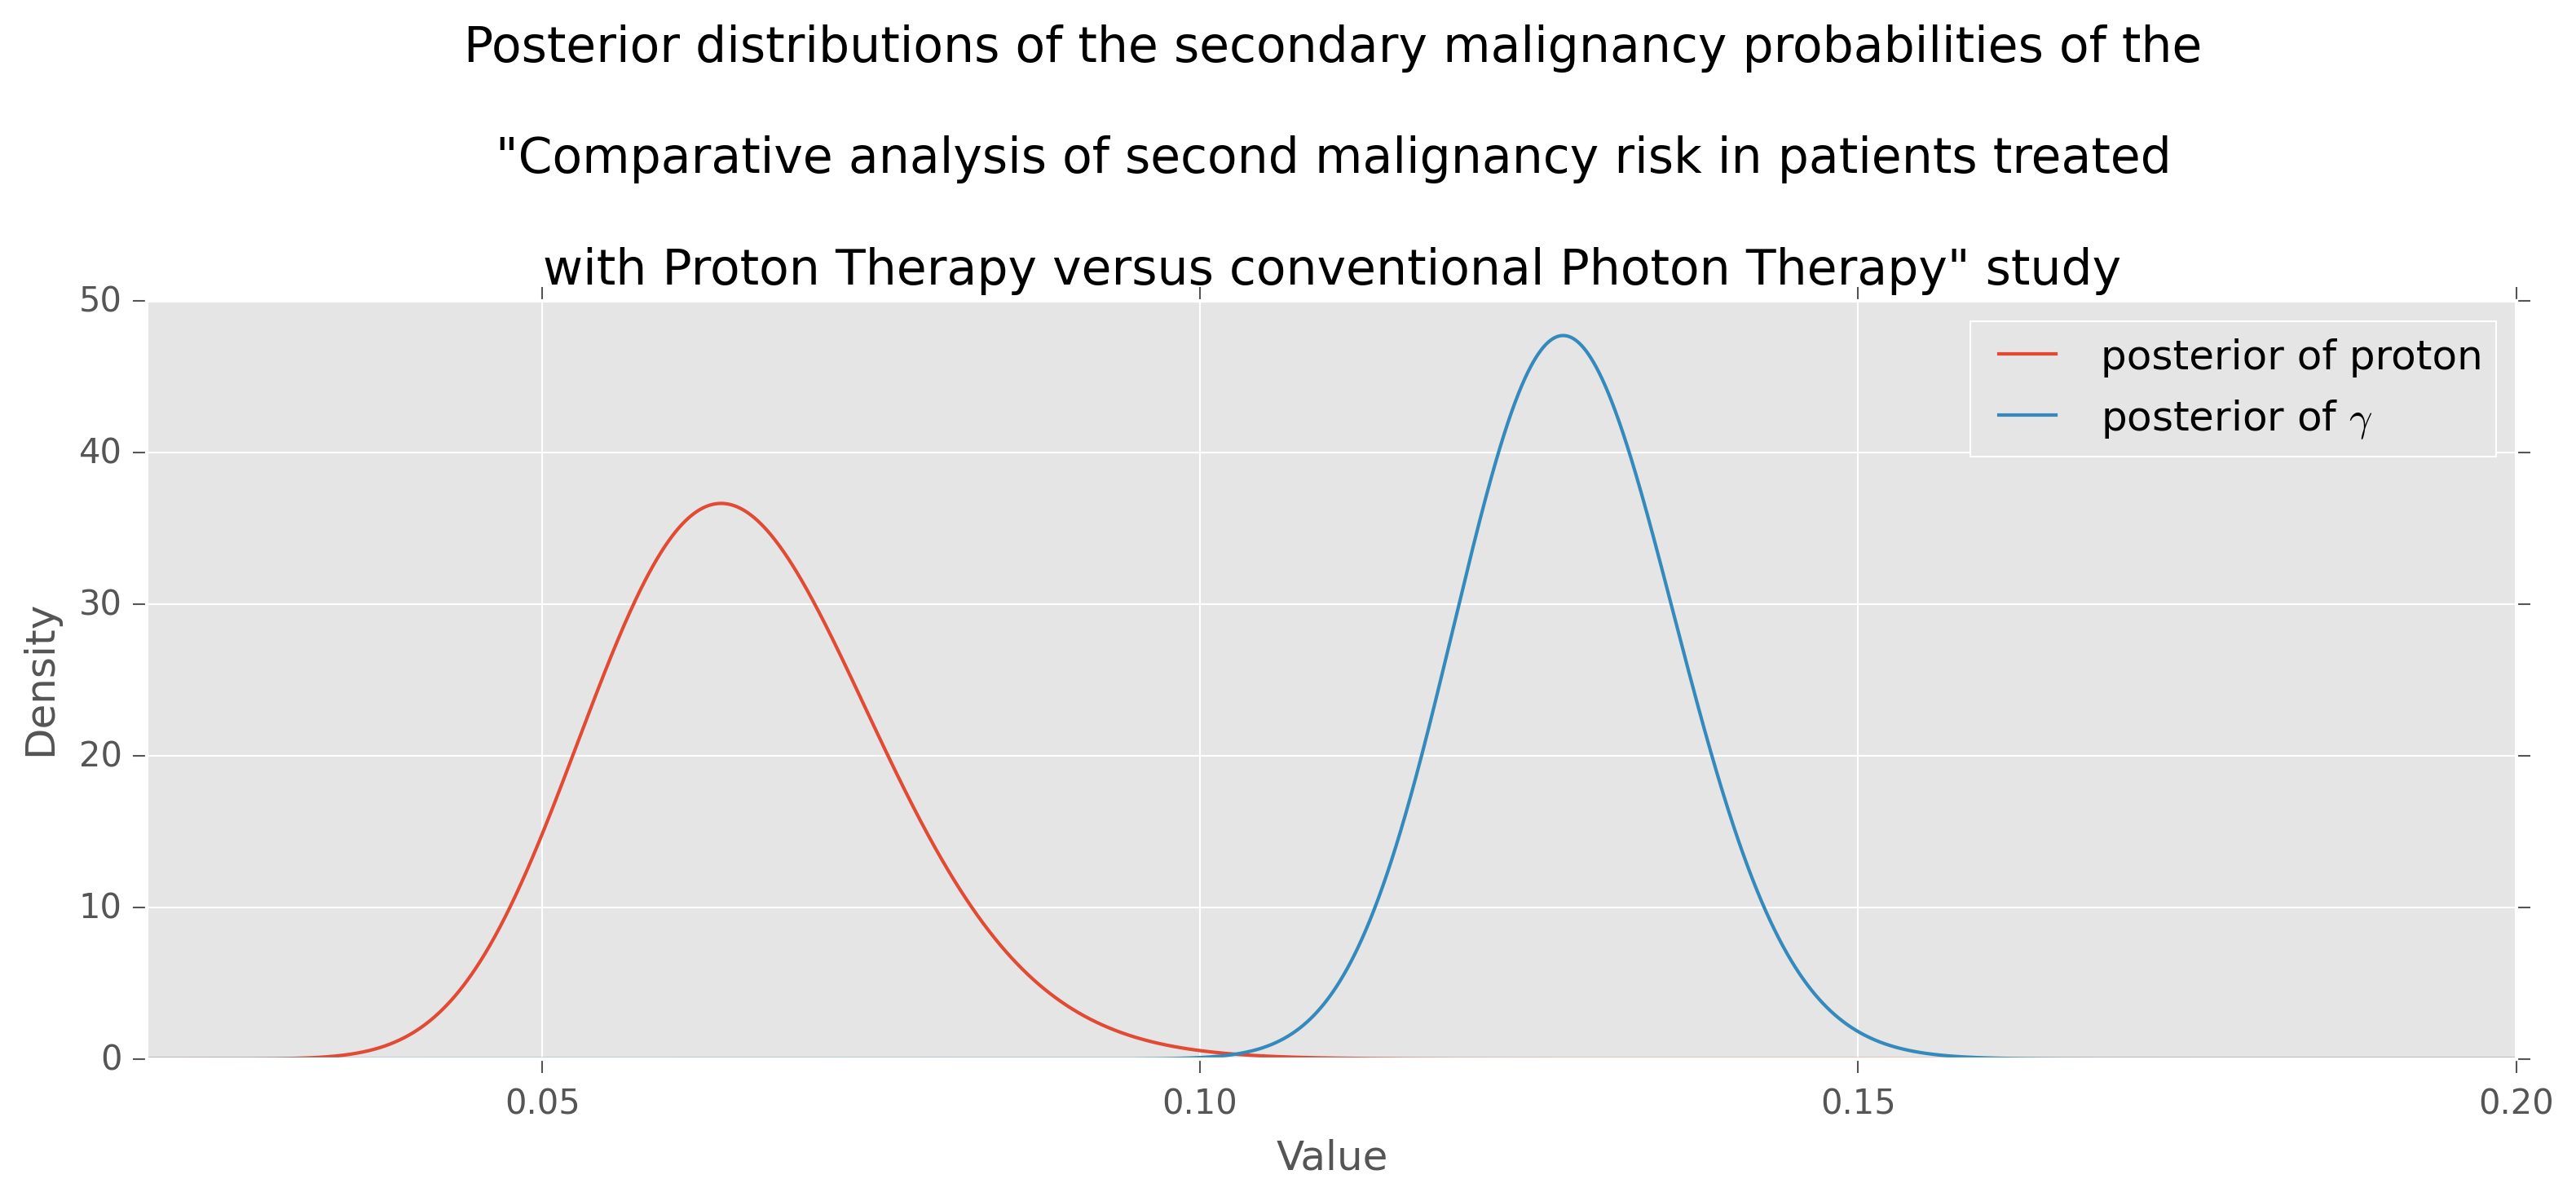

In [8]:

%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
x = np.linspace(0,1, 50000)
plt.plot(x, posterior_proton.pdf(x), label='posterior of proton')
plt.plot(x, posterior_gamma.pdf(x), label='posterior of $\gamma$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("""Posterior distributions of the secondary malignancy probabilities of the \n
"Comparative analysis of second malignancy risk in patients treated \n
with Proton Therapy versus conventional Photon Therapy" study""")
plt.legend()
plt.xlim(0.02,0.2)

(array([  1.46479857e-04,   9.05511840e-04,   4.46097745e-03,
          1.74311029e-02,   5.06953467e-02,   1.17317049e-01,
          2.27982580e-01,   3.80155177e-01,   5.71770804e-01,
          7.60550048e-01,   9.30160405e-01,   1.05603321e+00,
          1.13236253e+00,   1.14145094e+00,   1.09847242e+00,
          1.01531181e+00,   9.08141820e-01,   7.81416769e-01,
          6.61609563e-01,   5.46696115e-01,   4.39672606e-01,
          3.51525023e-01,   2.73571107e-01,   2.13294646e-01,
          1.62745779e-01,   1.22277389e-01,   9.17363392e-02,
          6.74339994e-02,   5.16474658e-02,   3.83111407e-02,
          2.85835465e-02,   2.00544240e-02,   1.43750005e-02,
          1.08461676e-02,   7.57700349e-03,   5.53960185e-03,
          3.84842532e-03,   2.66327012e-03,   2.08400887e-03,
          1.57798755e-03,   9.78751769e-04,   8.18955561e-04,
          5.19337673e-04,   4.92704972e-04,   3.12934239e-04,
          2.19719785e-04,   1.86428908e-04,   9.32144541e-05,
        

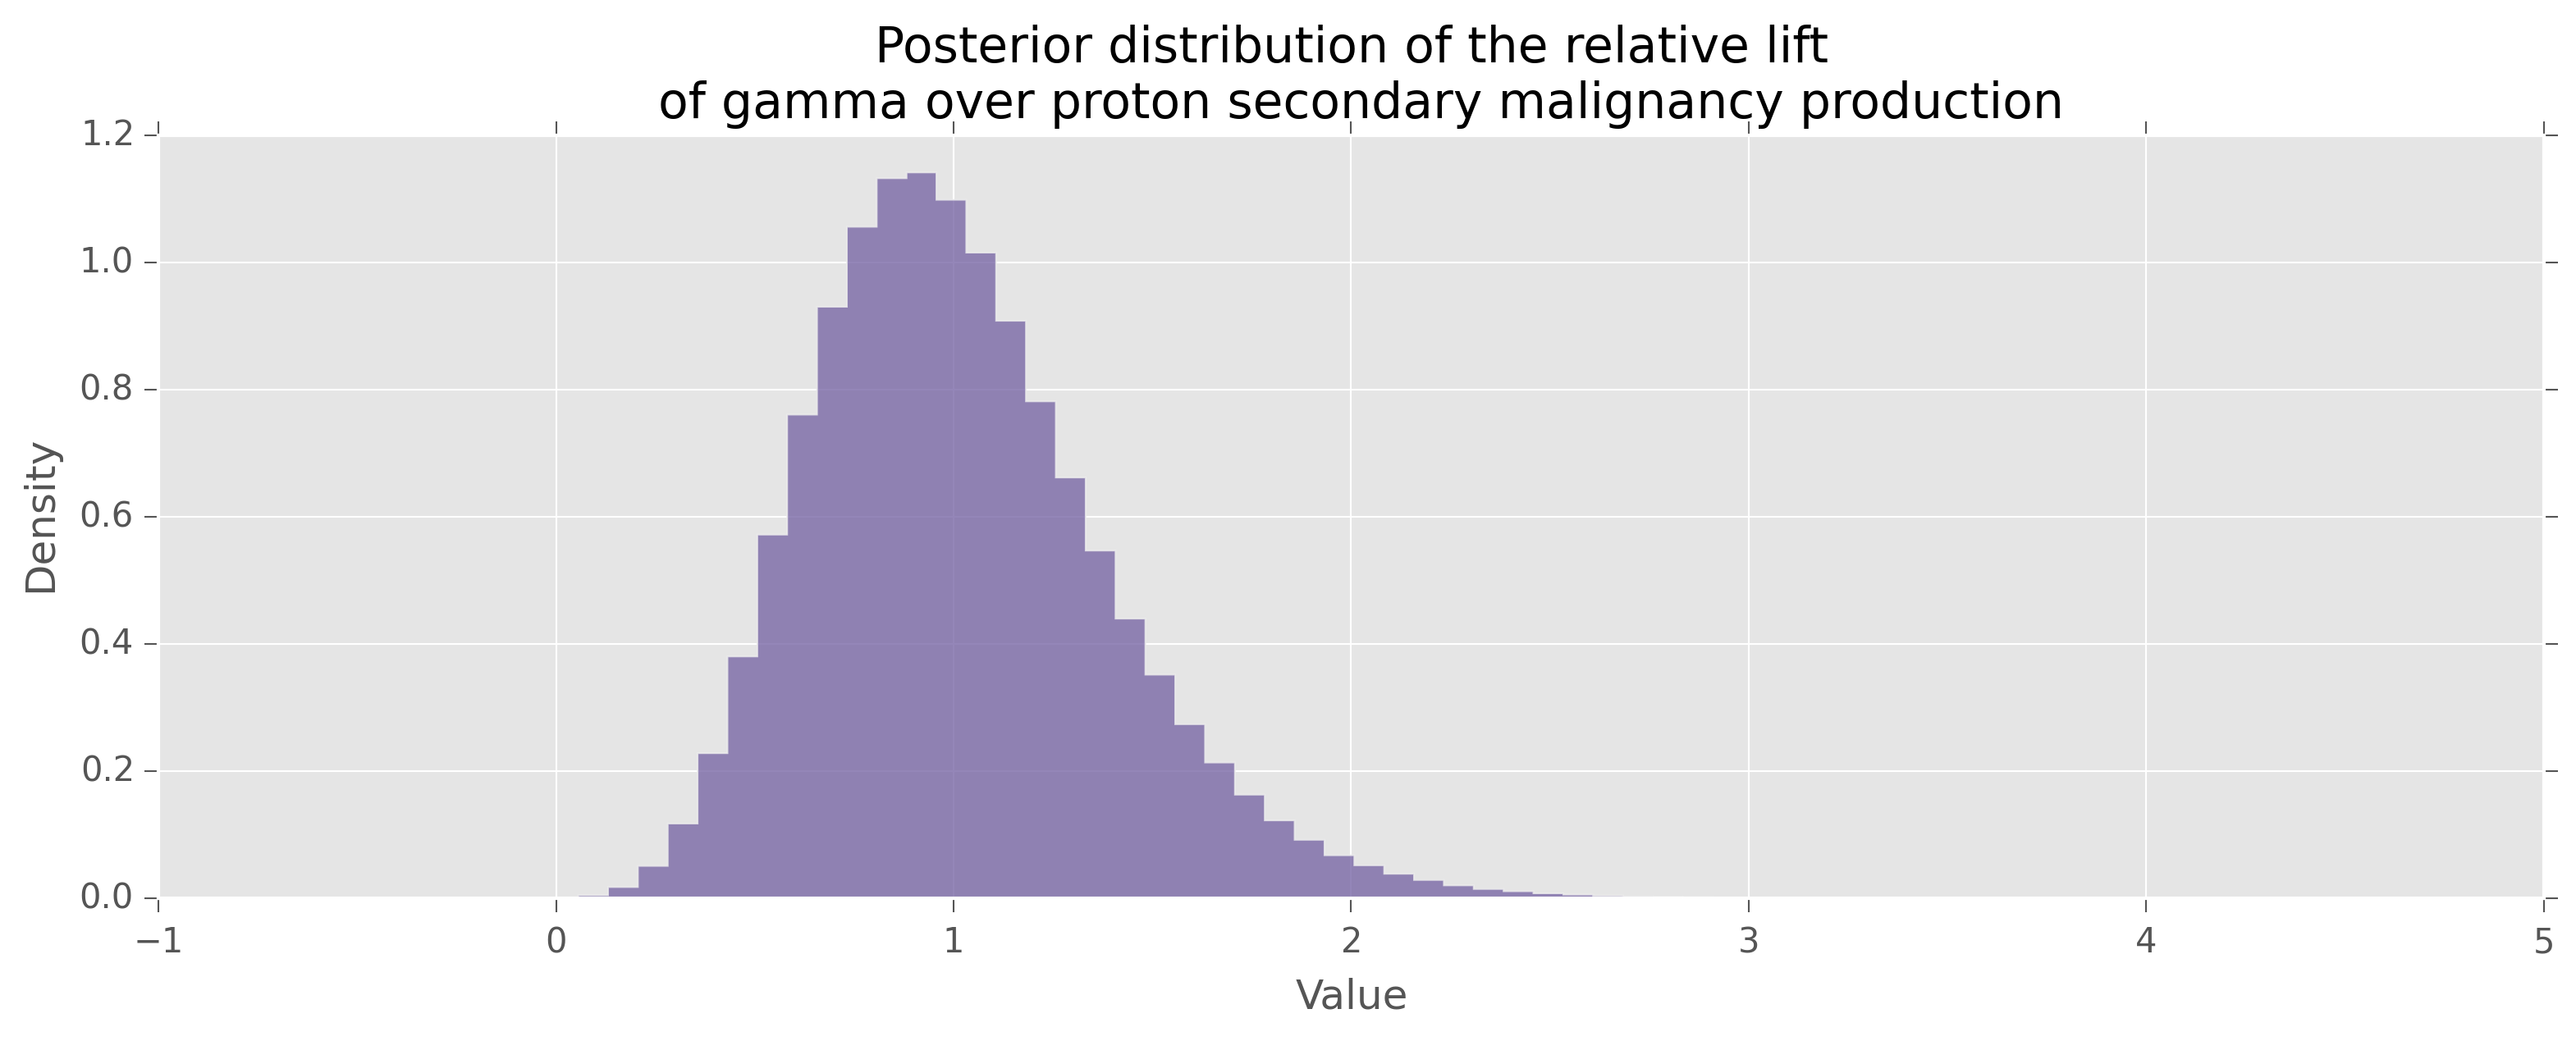

In [9]:
def relative_increase(a,b):
    return (a-b)/b

posterior_rel_increase = relative_increase(samples_posterior_gamma,
     samples_posterior_proton)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("""Posterior distribution of the relative lift \n of gamma over proton secondary malignancy production""")

plt.hist(posterior_rel_increase,histtype='stepfilled', bins=60, alpha=0.80,
         label = 'relative increase',color='#7A68A6', normed=True)

In [10]:
print (posterior_rel_increase > 0.2).mean()
print (posterior_rel_increase > 0.5).mean()
print (posterior_rel_increase > 1.).mean()

0.998439
0.9427775
0.471988


This means that there is a 47% chance that gamma therapy is a full 100% more likely than proton therapy to cause seeconday tumors.

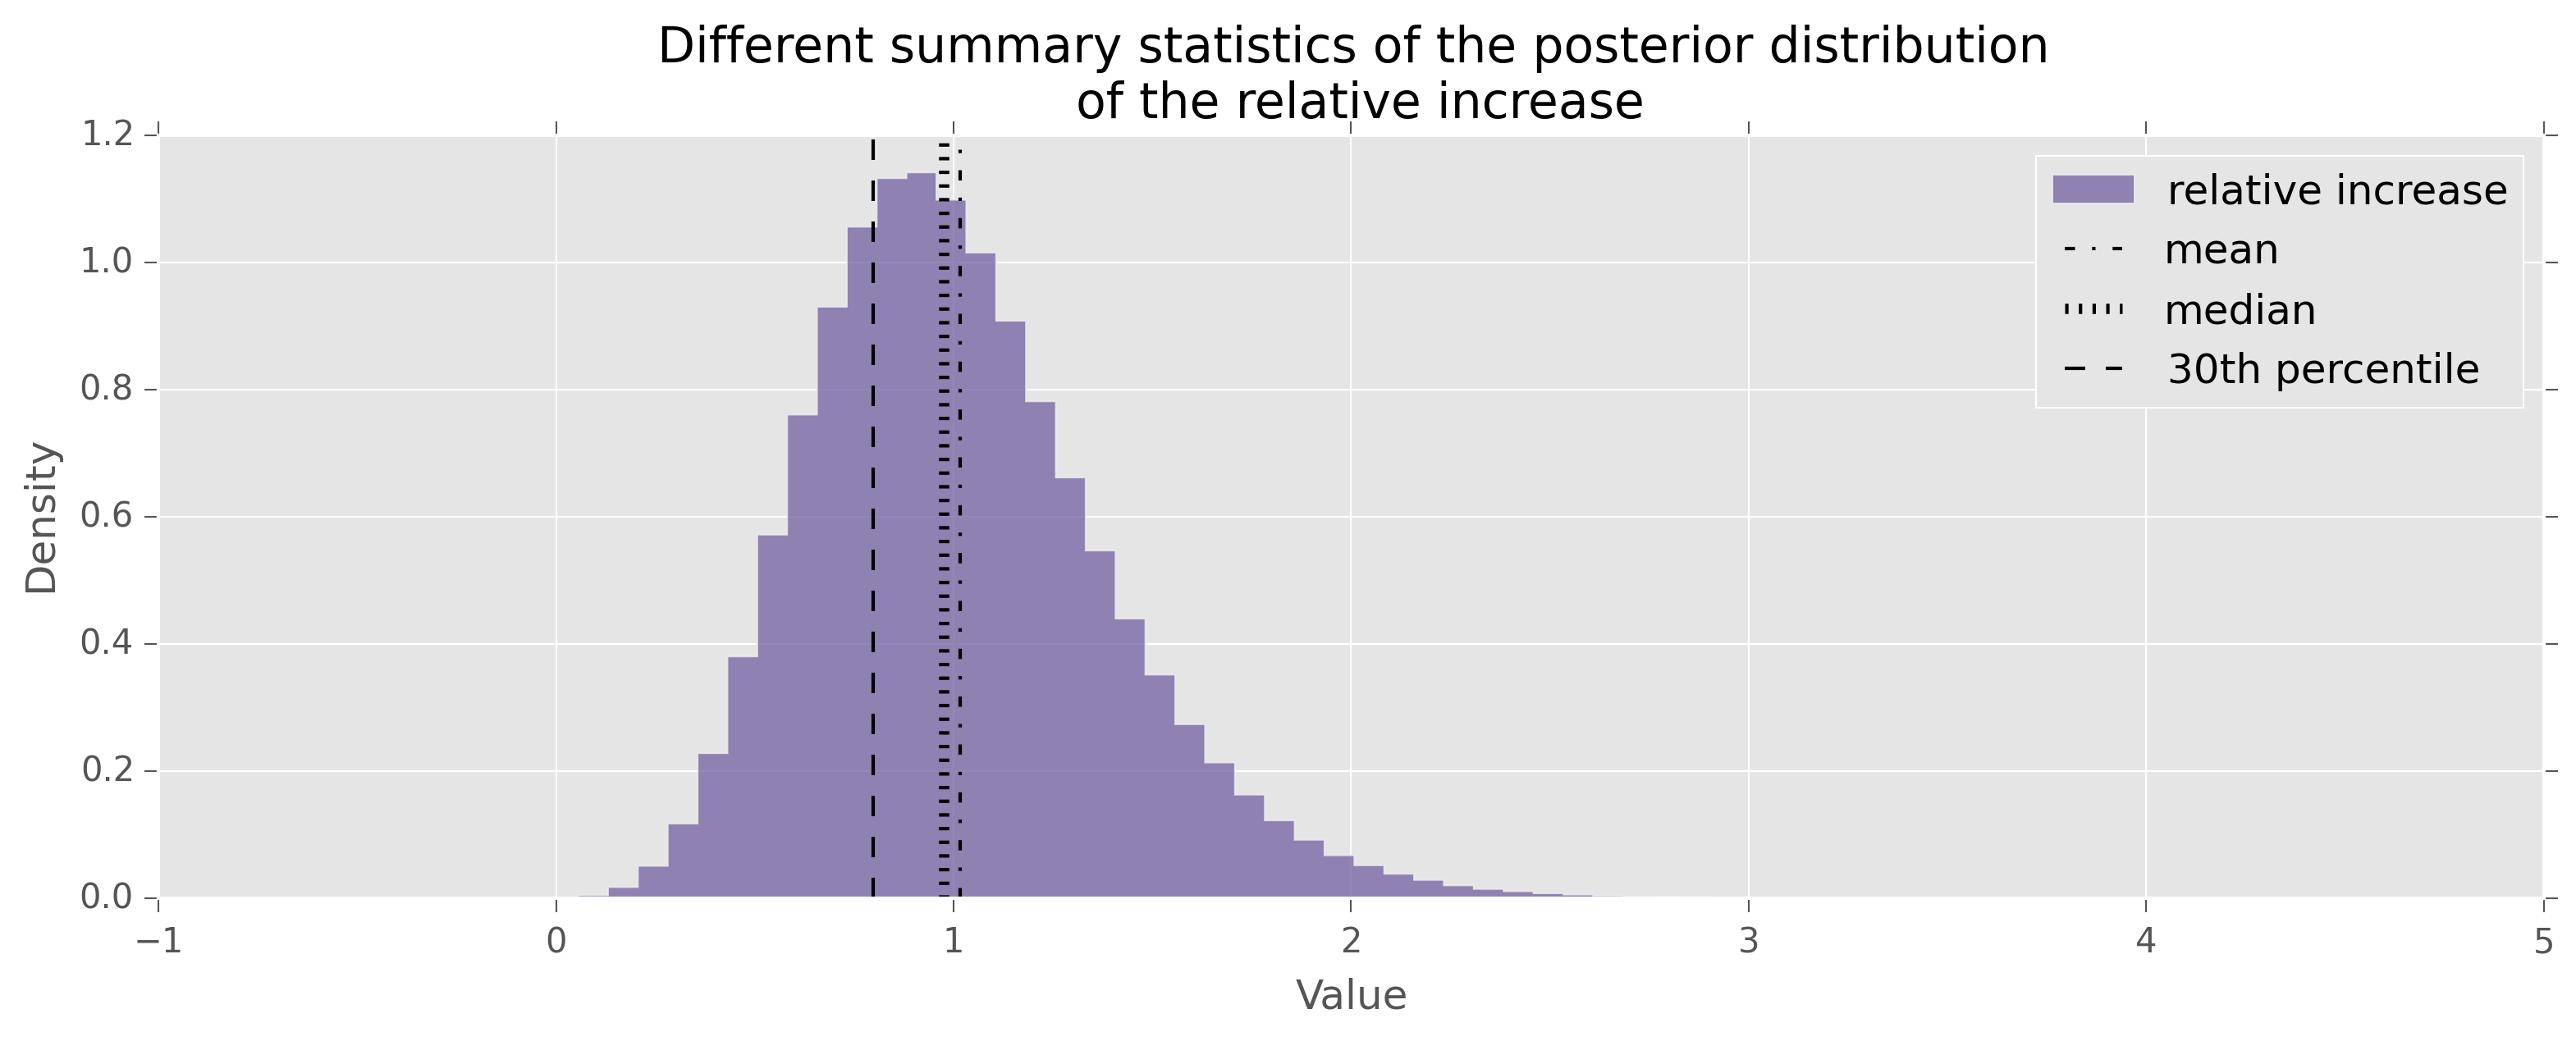

In [11]:
mean = posterior_rel_increase.mean()
median = np.percentile(posterior_rel_increase, 50)
conservative_percentile = np.percentile(posterior_rel_increase, 30)

plt.hist(posterior_rel_increase,histtype='stepfilled', bins=60, alpha=0.80,
         label = 'relative increase',color='#7A68A6', normed=True)


plt.vlines(mean, 0, 1.2, linestyles='-.', label='mean')
plt.vlines(median, 0, 1.2, linestyles=':', label='median', lw=3)
plt.vlines(conservative_percentile, 0, 1.2, linestyles='--',
           label='30th percentile')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Different summary statistics of the posterior distribution \n of the relative increase")

plt.legend();

### Health and Social Care Information Centre

http://www.hscic.gov.uk/searchcatalogue?productid=15361&q=cancer&infotype=0%2fOpen+data&sort=Relevance&size=10&page=1#top


```
Morbidity outcomes included conditions associated with radiation therapy for prostate cancer: gastrointestinal morbidity, urinary incontinence, nonincontinence urinary morbidity, sexual dysfunction, and hip fractures.12- 16 Diagnoses and procedures in each morbidity category were counted as separate outcomes. Because the goal of this study was to examine long-term morbidity, we excluded person-time and diagnoses and procedures that occurred within 1 year of radiation therapy; acute radiation therapy–related morbidity commonly resolves and does not become long-term morbidity.12

Consistent with previous studies, we identified men requiring additional cancer therapy after radiation therapy as an indicator of disease recurrence.17- 19 Because radiation therapy is commonly used in combination with brachytherapy20 and sometimes as neoadjuvant treatment for planned prostatectomy,21 we defined additional cancer treatment as that occurring 9 months or more after initiation of radiation therapy. Furthermore, for patients who received radiation therapy concurrently with androgen deprivation therapy, additional treatment was defined as cessation of all treatment for 9 months or more, followed by reinitiation of androgen deprivation therapy or another salvage treatment.

Survival was not examined because death caused by prostate cancer is minimal within 5 years of diagnosis and not expected to be significantly different by radiation therapy technique within this period.1
```

```
The SEER registry provided patient-level demographic variables, including race, age at diagnosis, and marital status; census tract measures of income and education; SEER region; and population density (urban vs rural). Medicare claims data provided information on treatment dates, enrollment, and institutional affiliation with the Radiation Therapy Oncology Group, a radiation-specific clinical trials cooperative group. Radiation Therapy Oncology Group affiliation was used in propensity score weighting for the IMRT vs conformal radiation therapy comparison.

Baseline diagnoses of diabetes and conditions associated with the use of anticoagulation (atrial fibrillation and valvular disease) were determined by using claims within the year before radiation therapy (eAppendix); both have been shown to increase the morbidity risk from radiation therapy.22- 24 Use of androgen deprivation therapy in conjunction with radiation therapy was included as a covariate because of its potential effects on both disease control and erectile dysfunction.25
```



## <font color='green'>Respect for Persons</font>




Markov's Bound:



$
P[ X \geq t E[x]] < \frac{1}{t}
$

Did Ronnie get it wrong??

Chebyshev's inequality
$
P(|X - E(X)| \geq a) \leq \frac{Var(X)}{a^{2}}
$

Soooo.......

in the thinkbayes euro problem example, we get that the probability (if it is a fair coin) of getting 140 heads in 250 flips of the coin is less than 1/1.12 

Lets just get the CDF of the binomial distribution with p = .5 and n = 250, evaluate it at k = 140.

$
{n \choose k} p^{k} ( 1 - p )^{n-k}
$

http://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.binom.html

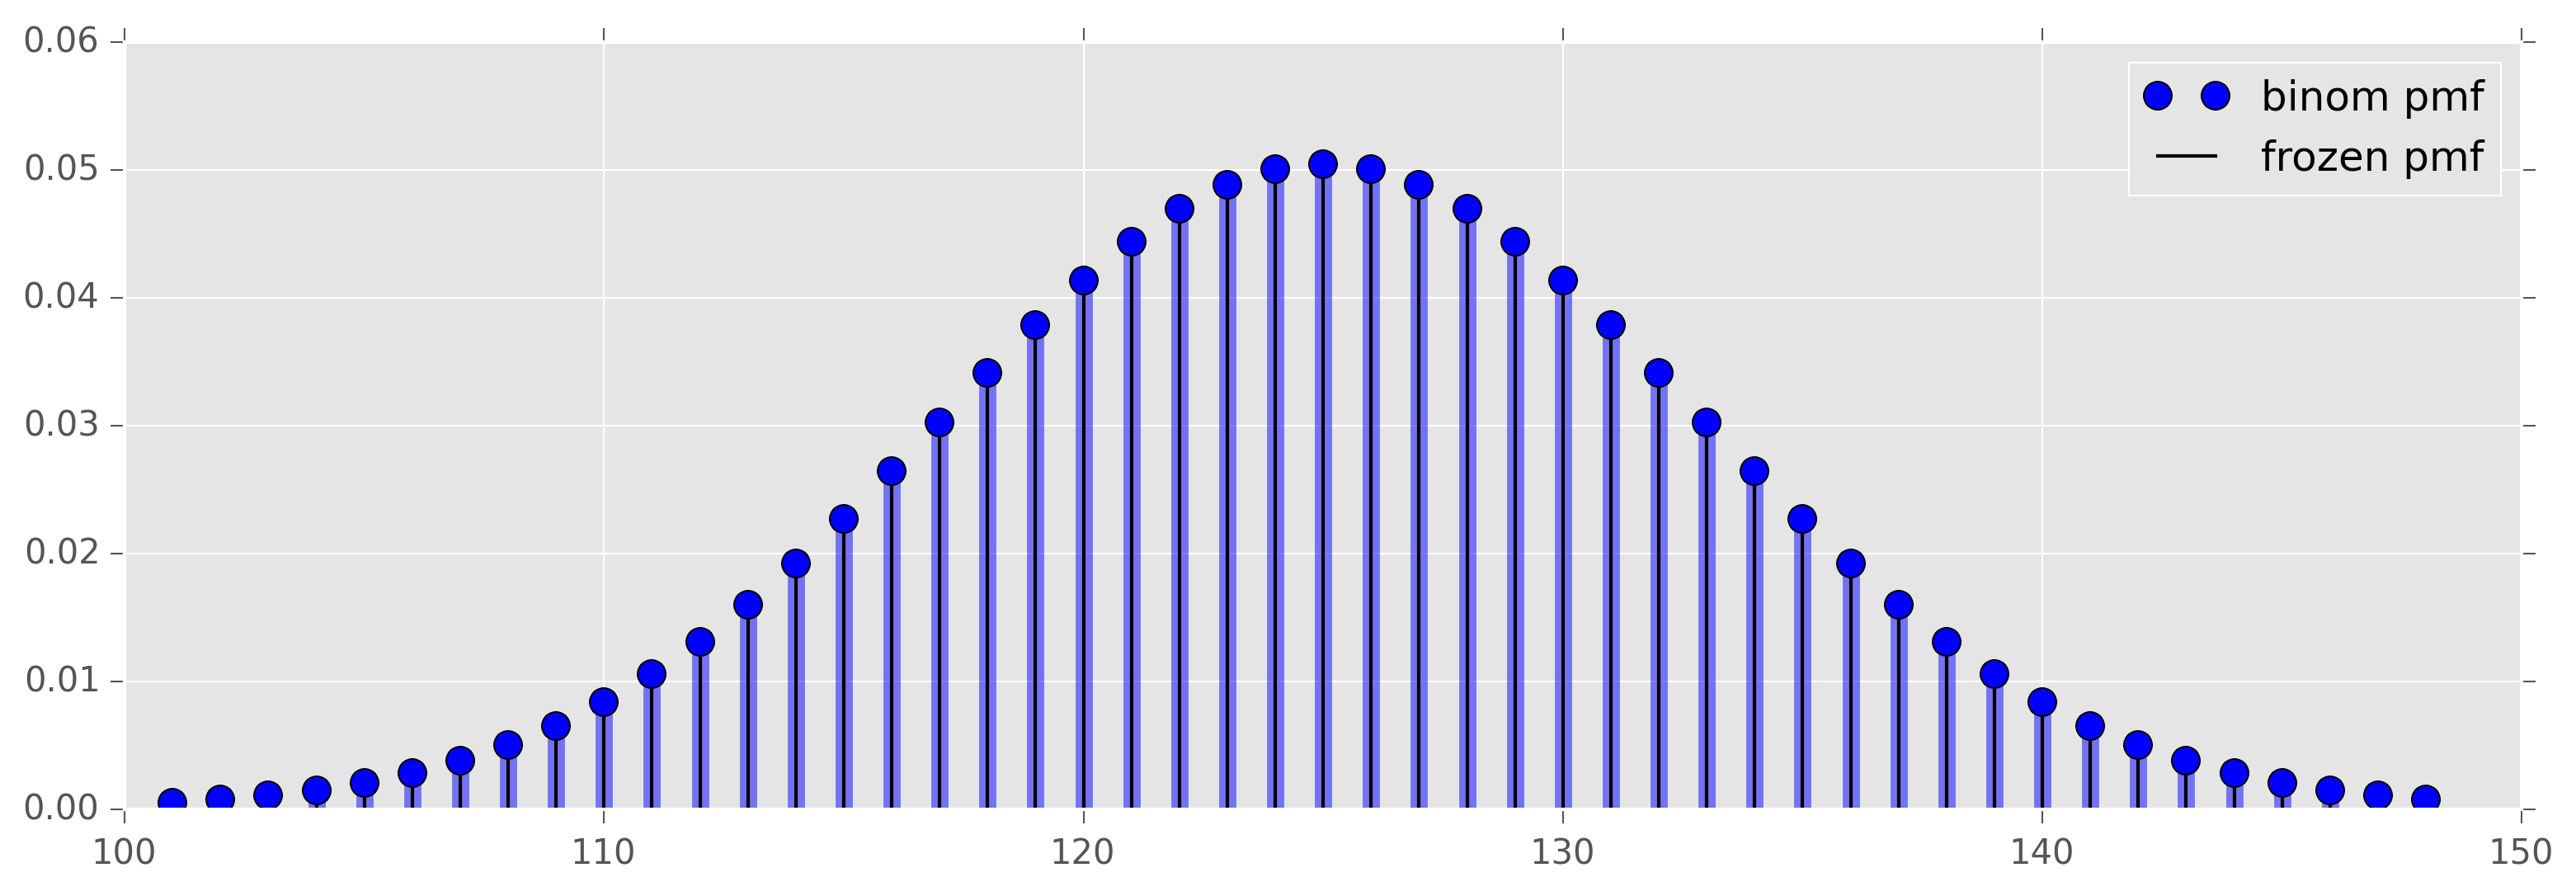

In [36]:
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)

n, p = 250, 0.5

x = np.arange(binom.ppf(0.001, n, p), binom.ppf(0.999, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = binom(n,p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best')
plt.show()

Alternatively, the distribution object can be called (as a function) to fix the shape and location. This returns a "frozen" RV object holding the given parameters fixed.

Freeze the distribution and display the frozen ```pmf```:


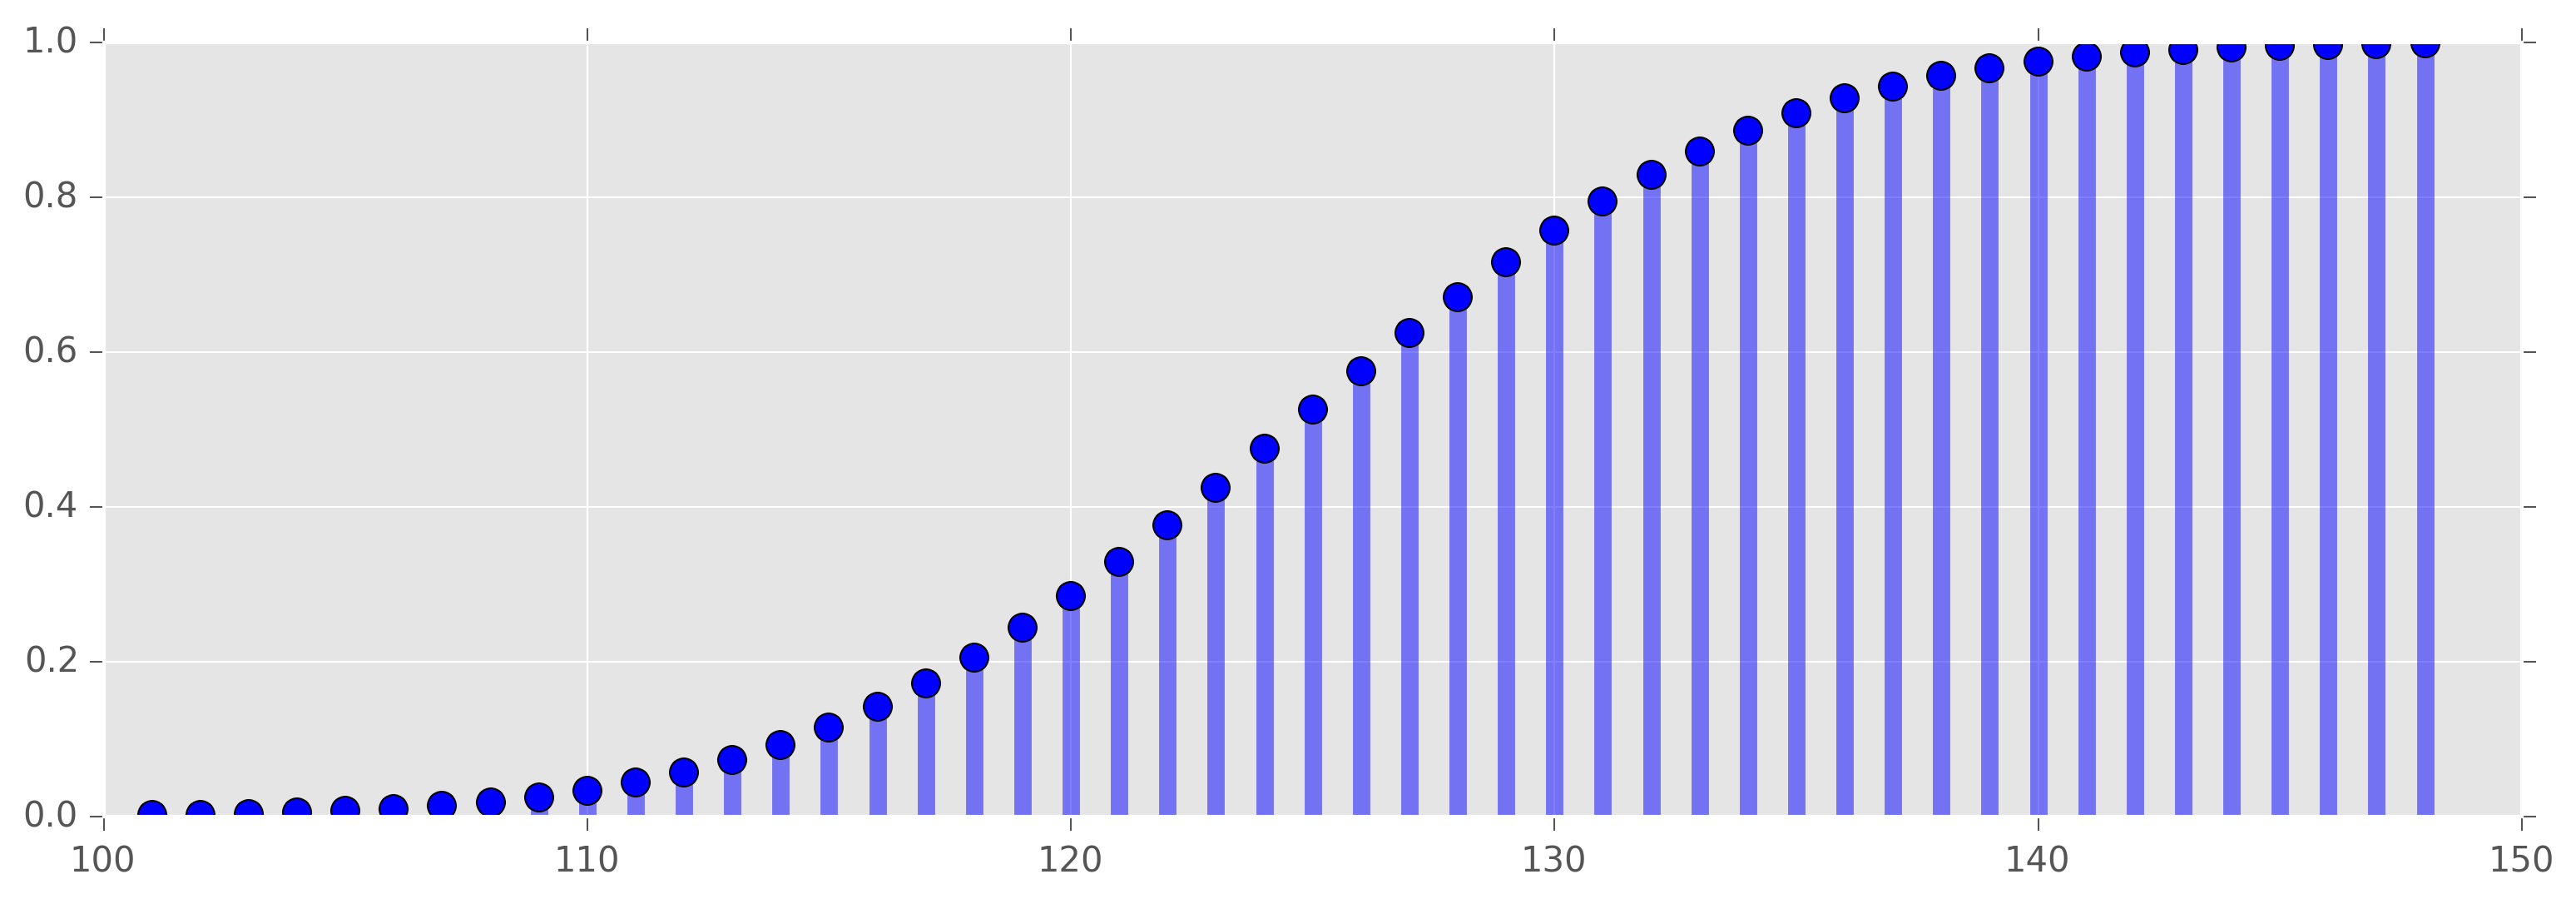

In [32]:
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)

n, p = 250, 0.5

x = np.arange(binom.ppf(0.001, n, p), binom.ppf(0.999, n, p))
ax.plot(x, binom.cdf(x, n, p), 'bo', ms=8, label='binom cdf')
ax.vlines(x, 0, binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5)



In [33]:
print binom.cdf(140, n, p)

0.975146606105


In [34]:
print 1 - binom.cdf(140, n, p)

0.0248533938951


http://www.greenteapress.com/thinkbayes/html/thinkbayes005.html#toc32

```
A statistical statement appeared in “The Guardian" on Friday January 4, 2002:
When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110. ‘It looks very suspicious to me,’ said Barry Blight, a statistics lecturer at the London School of Economics. ‘If the coin were unbiased, the chance of getting a result as extreme as that would be less than 7%.’
But do these data give evidence that the coin is biased rather than fair?
```

Actually, this lecturerer guy was too generous, the chances are just 2.5 percent.

In [39]:
print binom.sf(140, n, p)
print binom.sf(110, n, p)

print binom.sf(140, n, p) + binom.sf(110, n, p)

0.0248533938951
0.96678942438
0.991642818275


In [37]:
binom.ppf(.07,n,p)

113.0

In [42]:
print binom.interval(.93, n, p)  # that's why the guy said less than 7 percent!

(111.0, 139.0)


In [45]:
print binom.interval(.96,n,p)

(109.0, 141.0)


## Imaging Changes in Pediatric Intracranial Ependymoma Patients Treated With Proton Beam Radiation Therapy Compared to Intensity Modulated Radiation Therapy


http://dx.doi.org/10.1016/j.ijrobp.2015.05.018

Results:

Sixteen PBRT patients (43%) developed postradiation MRI changes at 3.8 months (median) with resolution by 6.1 months. Six IMRT patients (17%) developed changes at 5.3 months (median) with 8.3 months to resolution. Mean age at radiation was 4.4 and 6.9 years for PBRT and IMRT, respectively (P=.06). Age at diagnosis (>3 years) and time of radiation (≥3 years) was associated with fewer imaging changes on univariate analysis (odds ratio [OR]: 0.35, P=.048; OR: 0.36, P=.05). PBRT (compared to IMRT) was associated with more frequent imaging changes, both on univariate (OR: 3.68, P=.019) and multivariate (OR: 3.89, P=.024) analyses. Seven (3 IMRT, 4 PBRT) of 22 patients with changes had symptoms requiring intervention. Most patients were treated with steroids; some PBRT patients also received bevacizumab and hyperbaric oxygen therapy. None of the IMRT patients had lasting deficits, but 2 patients died from recurrent disease. Three PBRT patients had persistent neurological deficits, and 1 child died secondarily to complications from radiation necrosis.

Conclusions:

Postradiation MRI changes are more common with PBRT and in patients less than 3 years of age at diagnosis and treatment. It is difficult to predict causes for development of imaging changes that progress to clinical significance. These changes are usually self-limiting, but some require medical intervention, especially those involving the brainstem.

This work was supported by National Institutes of Health/National Cancer Institute Clinical Trials Support Resource grant P30CA016672.



In [12]:
PBRT_TOTAL = 37
IMRT_TOTAL = 35

PBRT_MRICHANGES = 16
IMRT_MRICHANGES = 6

from scipy.stats import beta
alpha_prior = 1
beta_prior = 1

posterior_proton = beta(alpha_prior + PBRT_MRICHANGES, beta_prior + PBRT_TOTAL - PBRT_MRICHANGES)

posterior_gamma = beta(alpha_prior + IMRT_MRICHANGES, beta_prior + IMRT_TOTAL - IMRT_MRICHANGES)


samples = 2000000

samples_posterior_proton = posterior_proton.rvs(samples)

samples_posterior_gamma = posterior_gamma.rvs(samples)

print (samples_posterior_gamma > samples_posterior_proton).mean()

0.008668


The above indidcates that there is a less than 1% chance that PBRT is better at avoiding postradiation MRI changes. Bu these are using "self-limiting" and do not necessaryily require medical intervention.

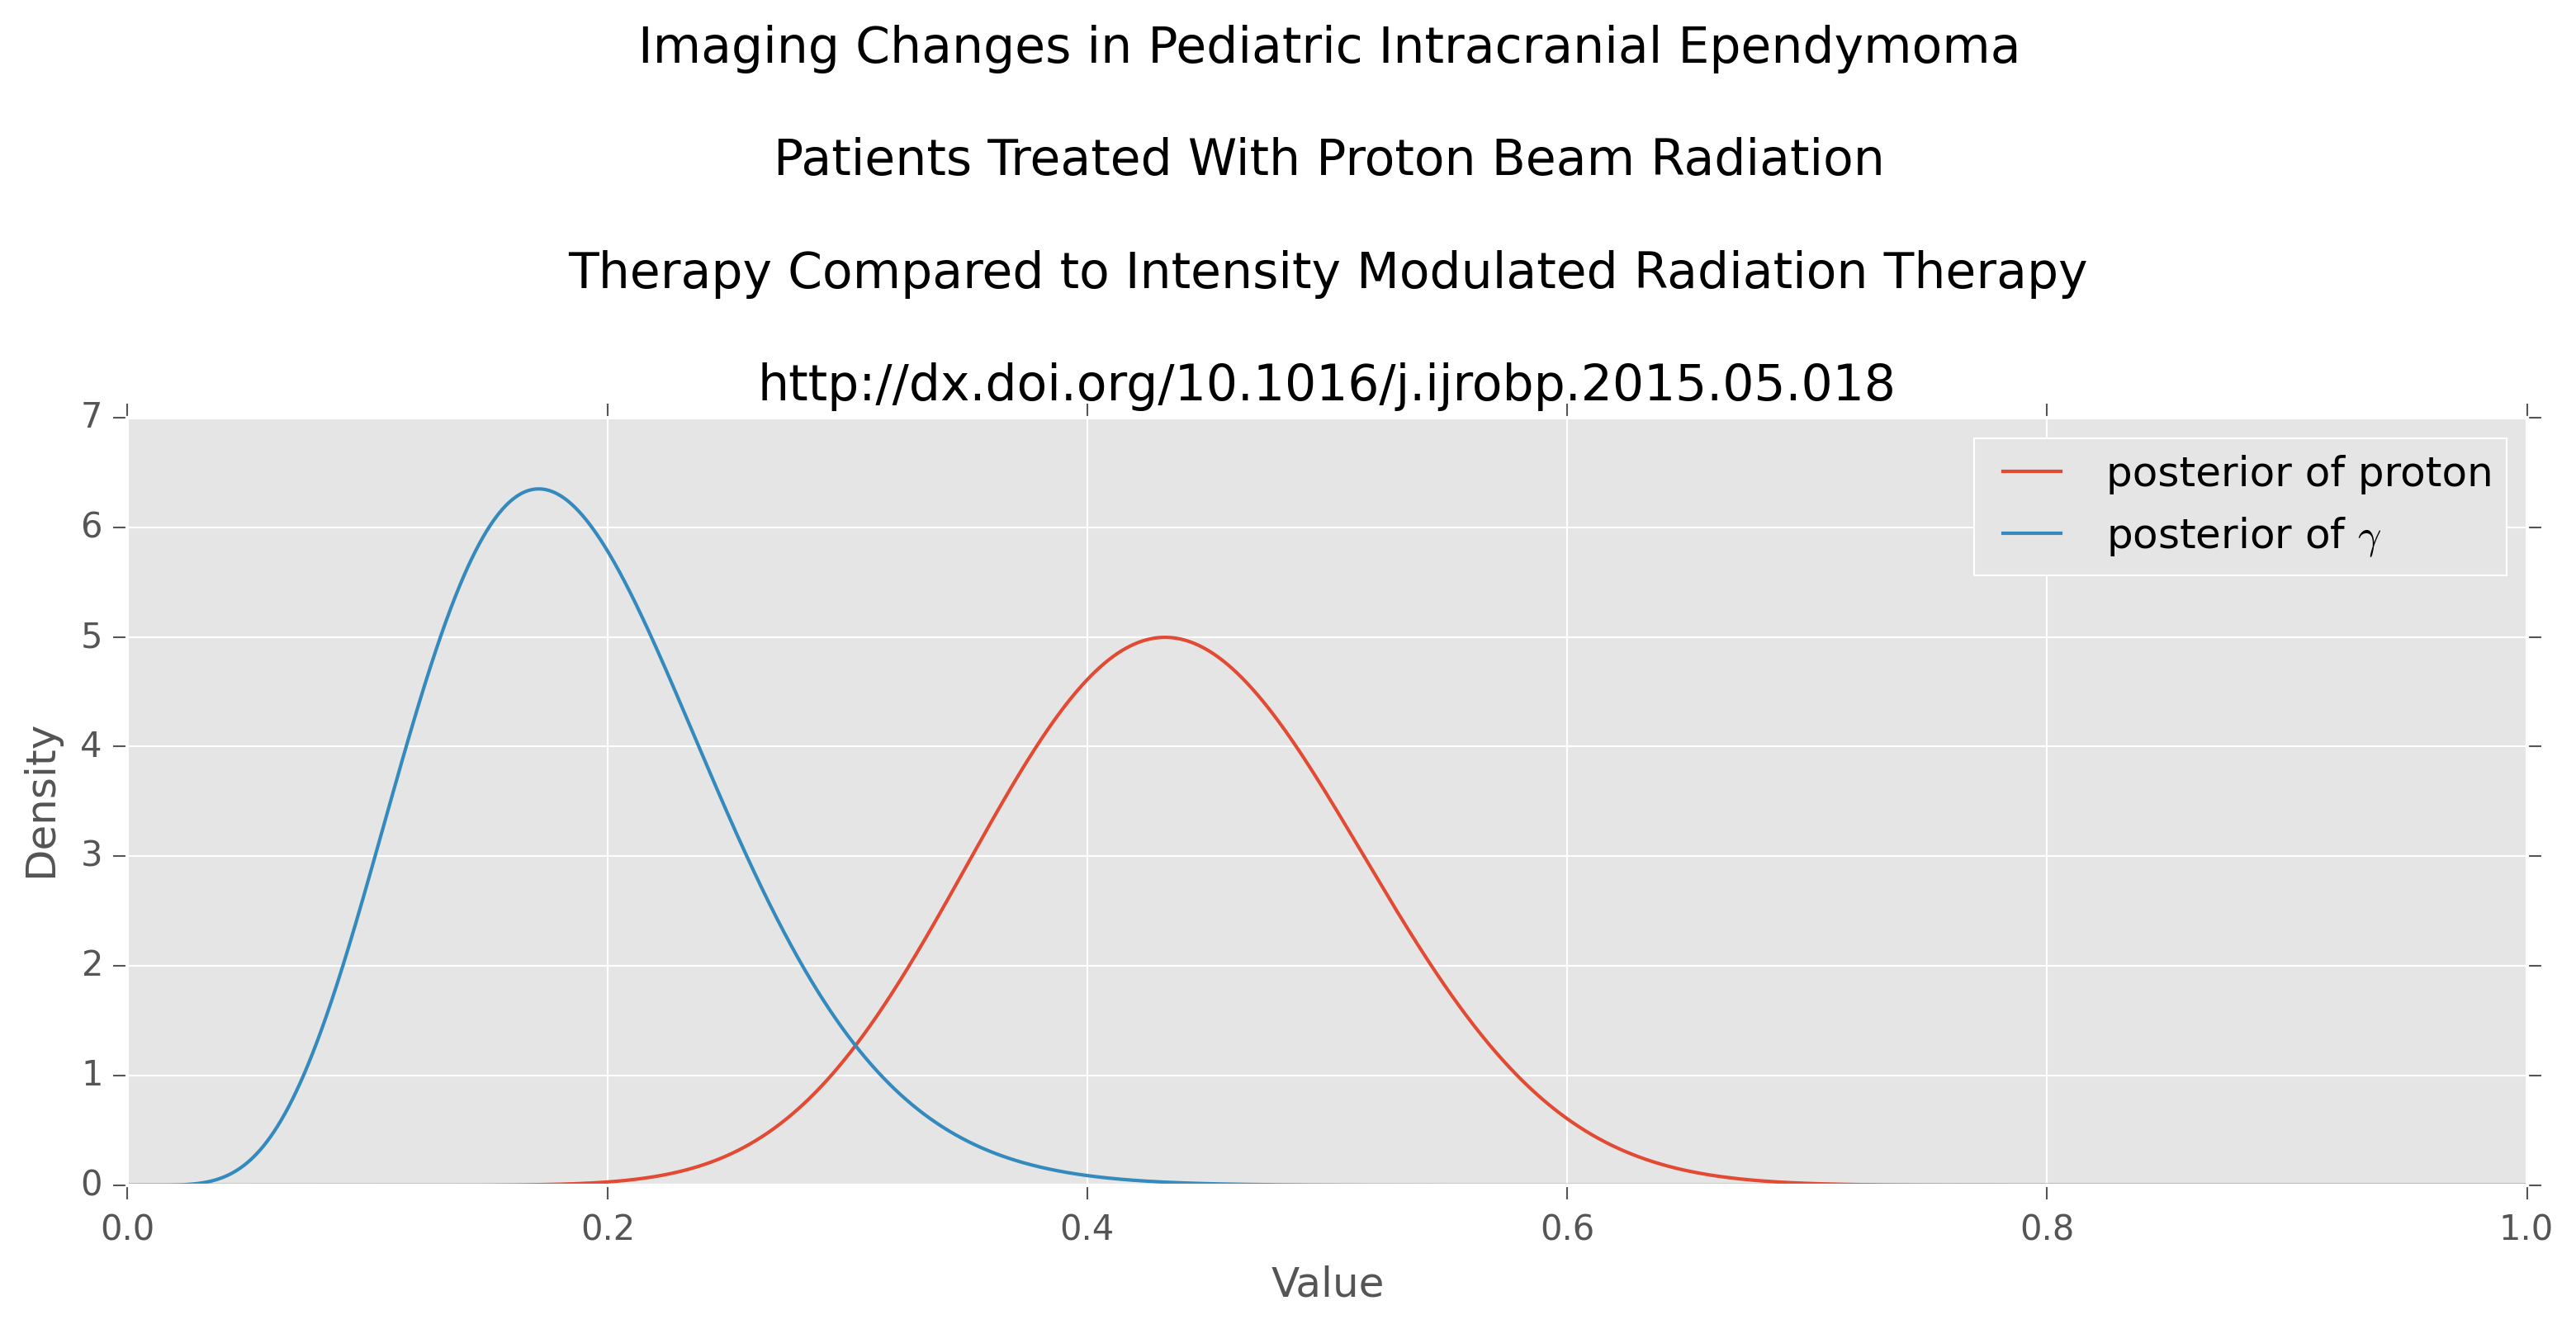

In [14]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
x = np.linspace(0,1, 50000)
plt.plot(x, posterior_proton.pdf(x), label='posterior of proton')
plt.plot(x, posterior_gamma.pdf(x), label='posterior of $\gamma$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("""Imaging Changes in Pediatric Intracranial Ependymoma \n
Patients Treated With Proton Beam Radiation \n
Therapy Compared to Intensity Modulated Radiation Therapy \n 
http://dx.doi.org/10.1016/j.ijrobp.2015.05.018""")
plt.legend()
#plt.xlim(0.02,0.2)

(array([  6.71210513e-03,   1.55015424e-01,   4.21880692e-01,
          4.57219647e-01,   3.39152507e-01,   2.15082328e-01,
          1.29106660e-01,   7.65829481e-02,   4.49142254e-02,
          2.74633285e-02,   1.66937914e-02,   1.05591233e-02,
          6.84373387e-03,   4.30435600e-03,   3.05340253e-03,
          1.96866639e-03,   1.36048395e-03,   9.51185811e-04,
          7.02340230e-04,   5.02495131e-04,   3.59336862e-04,
          2.96885268e-04,   1.80629225e-04,   1.58530969e-04,
          1.06648106e-04,   8.93538186e-05,   6.24515937e-05,
          5.66868312e-05,   3.74709562e-05,   2.78630187e-05,
          2.49806375e-05,   2.01766687e-05,   1.34511125e-05,
          9.60793749e-06,   1.34511125e-05,   8.64714374e-06,
          5.76476249e-06,   1.05687312e-05,   2.88238125e-06,
          4.80396874e-06,   5.76476249e-06,   2.88238125e-06,
          3.84317500e-06,   2.88238125e-06,   9.60793749e-07,
          2.88238125e-06,   9.60793749e-07,   2.88238125e-06,
        

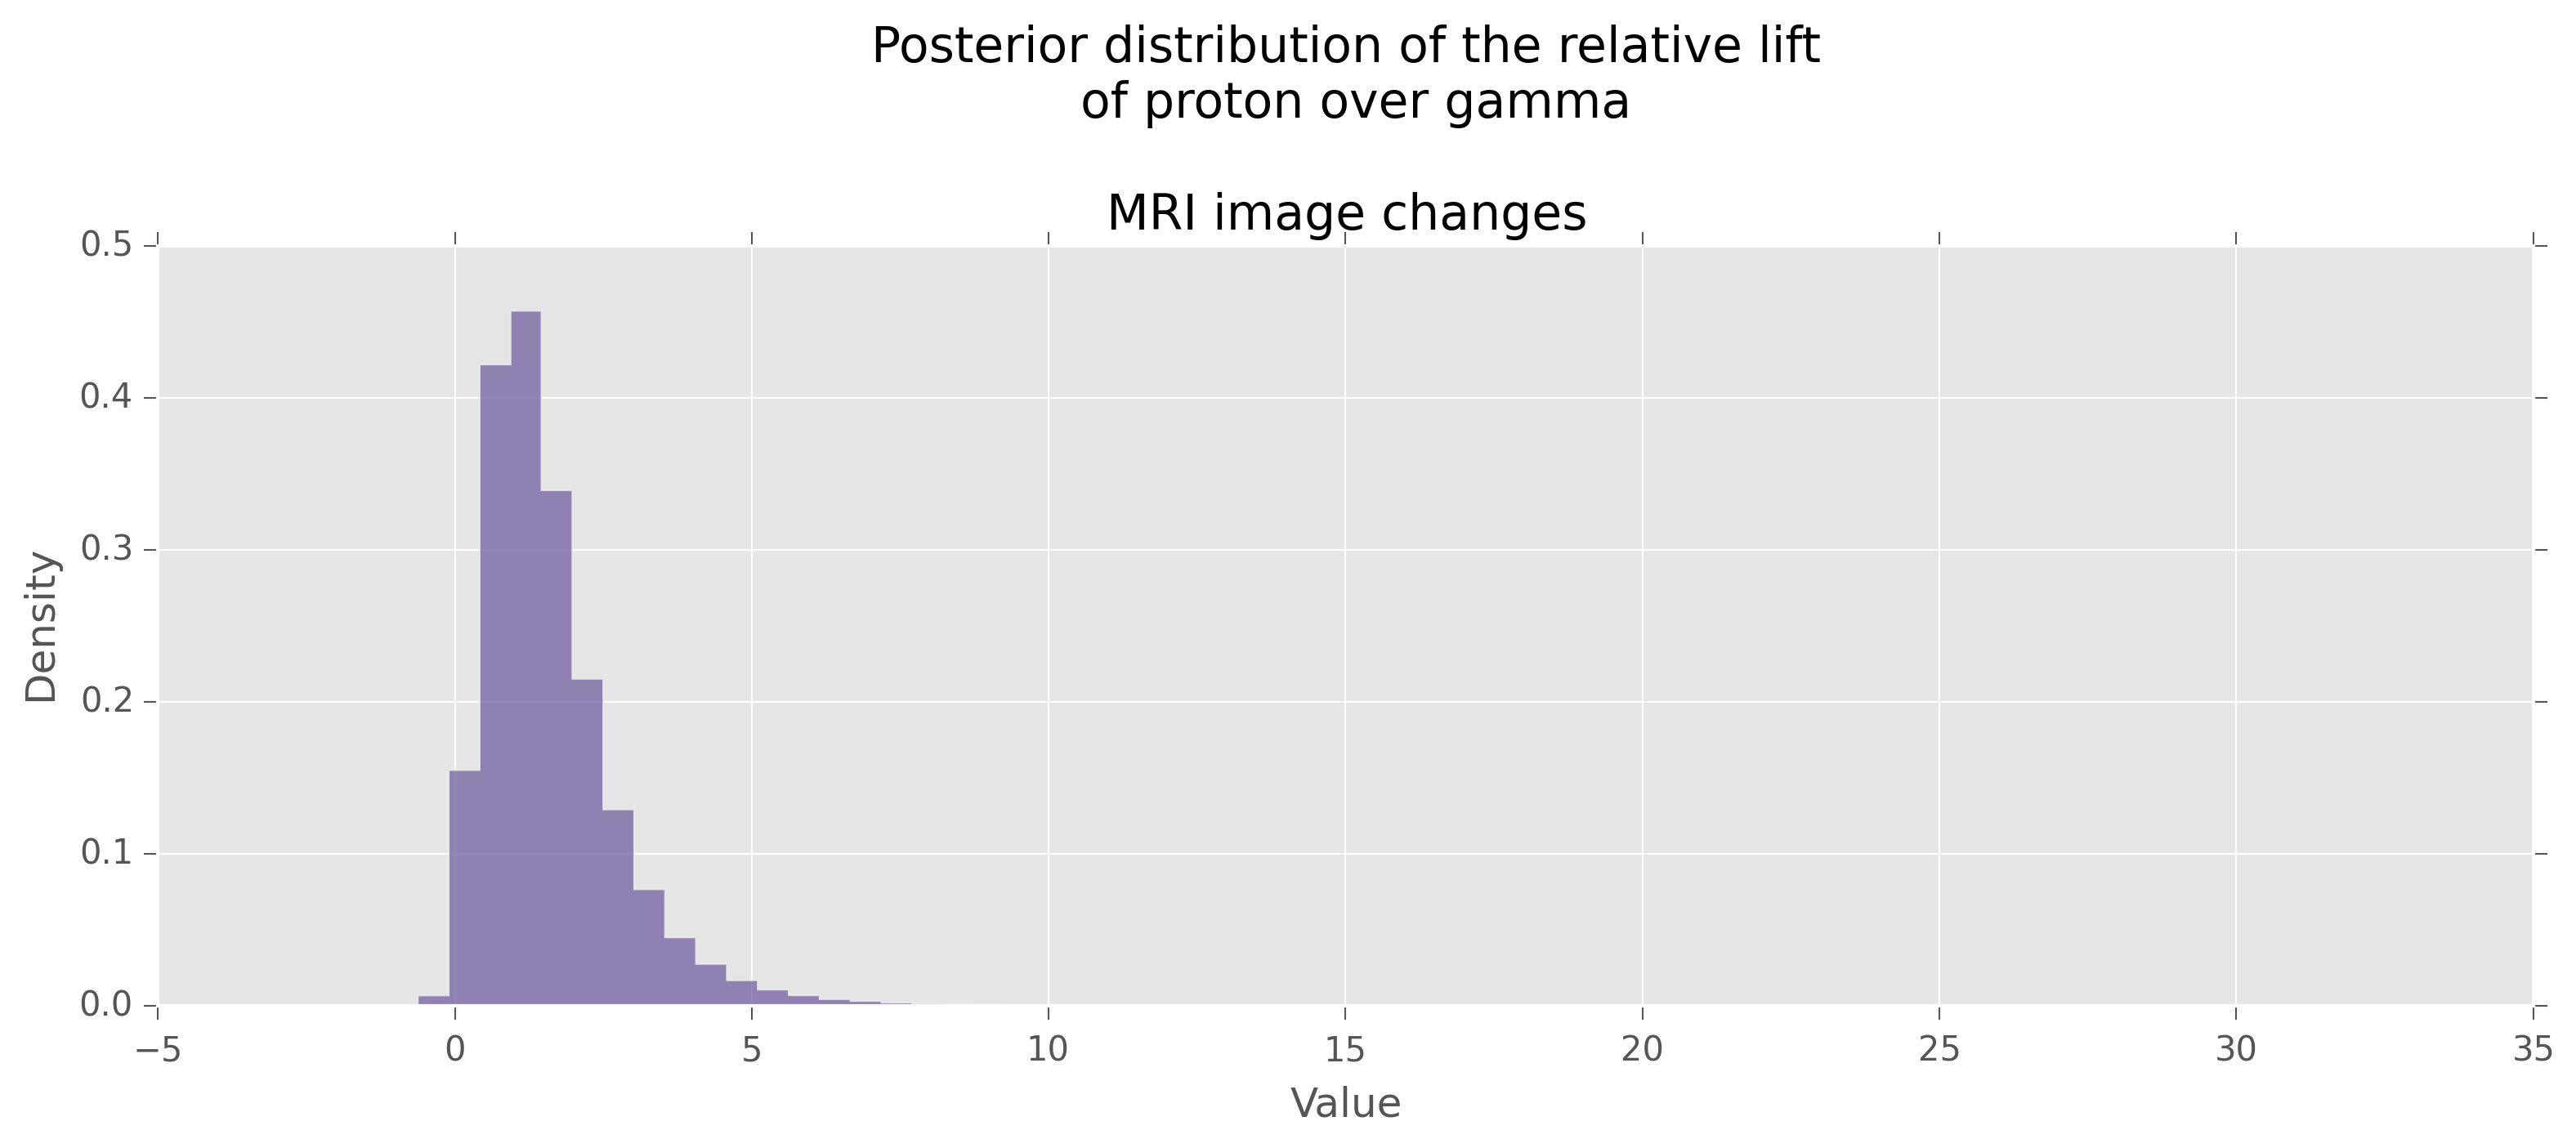

In [16]:
def relative_increase(a,b):
    return (a-b)/b

posterior_rel_increase = relative_increase(samples_posterior_proton,
     samples_posterior_gamma)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("""Posterior distribution of the relative lift \n of proton over gamma \n 
MRI image changes""")

plt.hist(posterior_rel_increase,histtype='stepfilled', bins=60, alpha=0.80,
         label = 'relative increase',color='#7A68A6', normed=True)

## Particle therapy for mucosal melanoma of the head and neck: A single-institution retrospective comparison of proton and carbon ion therapy

http://dx.doi.org/10.1007/s00066-013-0489-9

Abstract

Purpose

To retrospectively analyze treatment outcomes after particle therapy using protons or carbon ions for mucosal melanoma of the head and neck (HNMM) at the Hyogo Ion Beam Medical Center, as well as to compare proton therapy (PT) and carbon ion therapy (CIT).
Patients and methods

Data from 62 HNMM patients without metastasis, treated with PT or CIT between October 2003 and April 2011 were analyzed. Median patient age was 70.5 years (range 33–89 years). Of the total patients, 33 (53 %) had received PT and 29 (47 %) had undergone CIT. Protocols for 65 or 70.2 GyE in 26 fractions were used for both ion types.
Results

Median follow-up was 18.0 months (range 5.2–82.7 months). The 1-/2-year overall survival (OS) and local control (LC) rates were 93 %/61 % and 93 %/78 % for all patients, 91 %/44 % and 92 %/71 % for the PT patients and 96 %/62 % and 95 %/59 % for the CIT patients, respectively. No significant differences were observed between PT and CIT. Local recurrence was observed in 8 patients (PT: 5, CIT: 3) and 29 (PT: 18, CIT: 11) experienced distant metastases. Acute reactions were acceptable and all patients completed the planned radiotherapy. Regarding late toxicity, grade 3 or greater events were observed in 5 patients (PT: 3, CIT: 2), but no significant difference was observed between PT and CIT.
Conclusion

Our single-institution retrospective analysis demonstrated that particle therapy for HNMM achieved good LC, but OS was unsatisfactory. There were no significant differences between PT and CIT in terms of either efficacy or toxicity.



In [17]:
PT_TOTAL = 33
CIT_TOTAL = 29

PT_RECURRENCE = 5
CIT_RECURRENCE = 3

from scipy.stats import beta
alpha_prior = 1
beta_prior = 1

posterior_proton = beta(alpha_prior + PT_RECURRENCE, beta_prior + PT_TOTAL - PT_RECURRENCE)

posterior_cit = beta(alpha_prior + CIT_RECURRENCE, beta_prior + CIT_TOTAL - CIT_RECURRENCE)


samples = 2000000

samples_posterior_proton = posterior_proton.rvs(samples)

samples_posterior_cit = posterior_cit.rvs(samples)

print (samples_posterior_cit > samples_posterior_proton).mean()

0.304877


The above indicates that you really can't be sure which one is more likely to result in recurrence

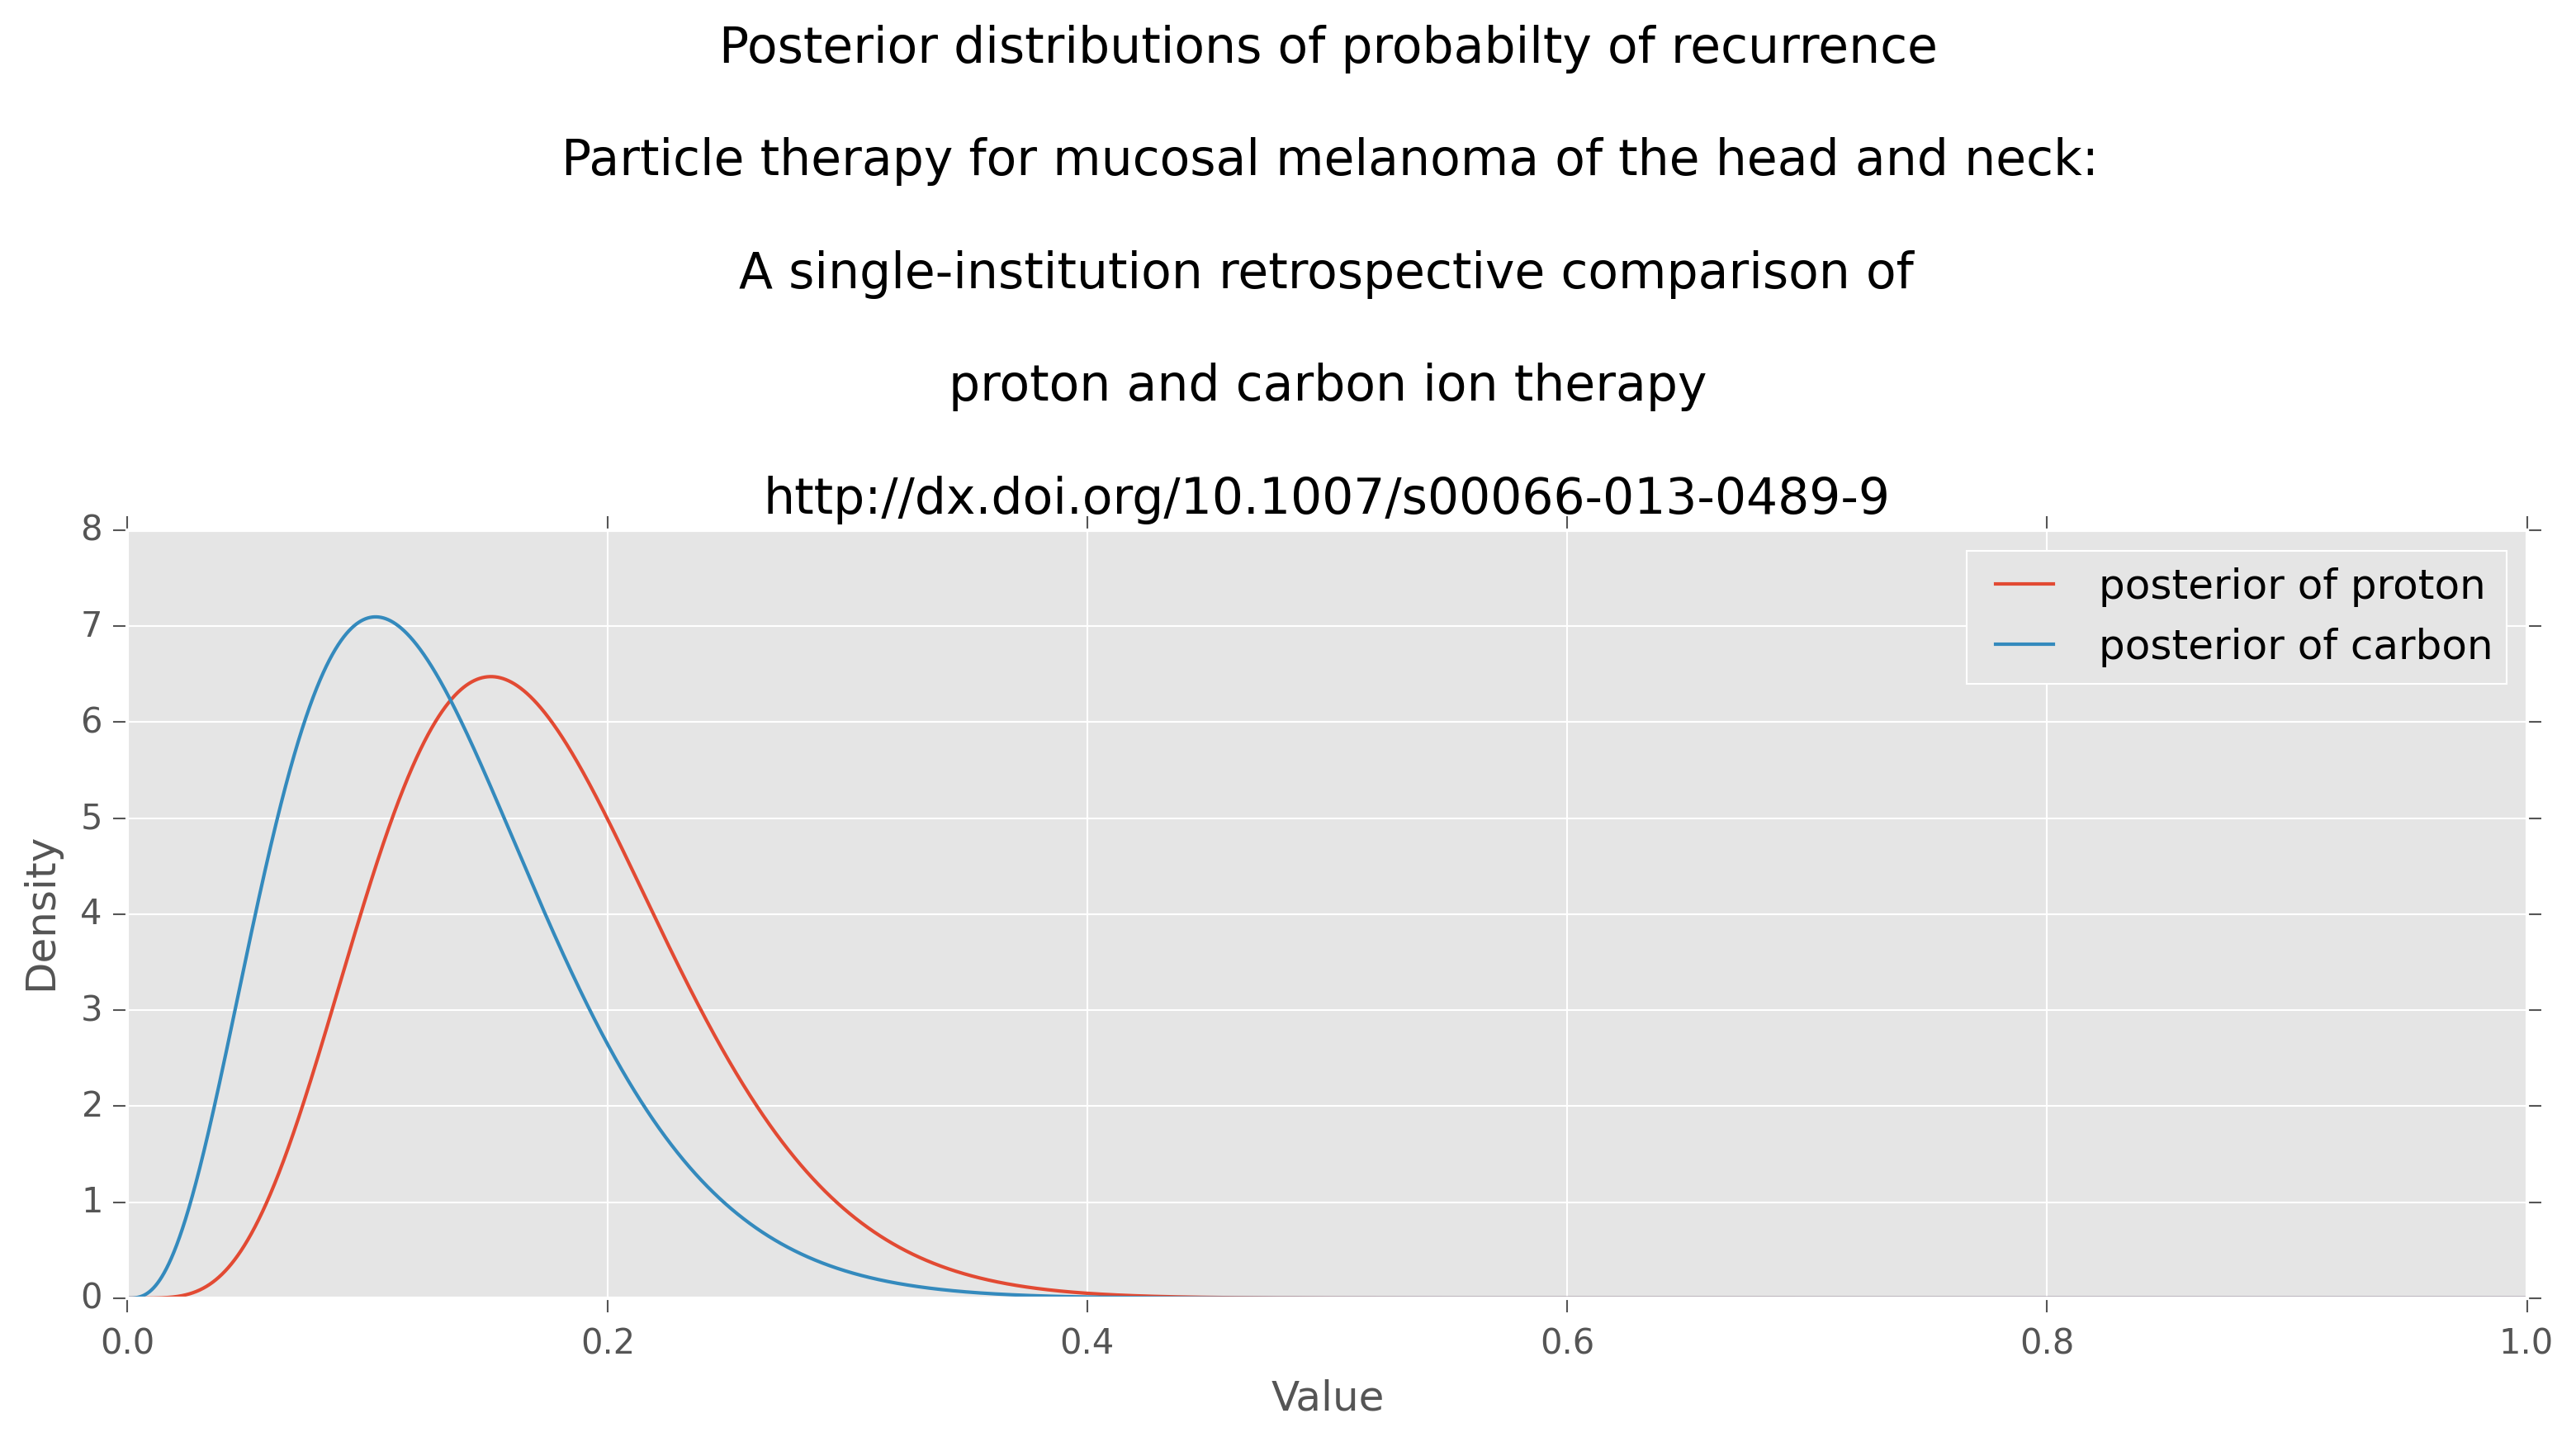

In [19]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
x = np.linspace(0,1, 50000)
plt.plot(x, posterior_proton.pdf(x), label='posterior of proton')
plt.plot(x, posterior_cit.pdf(x), label='posterior of carbon')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("""Posterior distributions of probabilty of recurrence \n
Particle therapy for mucosal melanoma of the head and neck: \n
A single-institution retrospective comparison of \n
proton and carbon ion therapy \n 
http://dx.doi.org/10.1007/s00066-013-0489-9""")
plt.legend()
#plt.xlim(0.02,0.2)

In [20]:
PT_TOTAL = 33
CIT_TOTAL = 29

PT_MET = 18
CIT_MET = 11

from scipy.stats import beta
alpha_prior = 1
beta_prior = 1

posterior_proton = beta(alpha_prior + PT_MET, beta_prior + PT_TOTAL - PT_MET)

posterior_cit = beta(alpha_prior + CIT_MET, beta_prior + CIT_TOTAL - CIT_MET)


samples = 2000000

samples_posterior_proton = posterior_proton.rvs(samples)

samples_posterior_cit = posterior_cit.rvs(samples)

print (samples_posterior_cit > samples_posterior_proton).mean()

0.0988355


More likely to have distant metastases with PT than with CIT

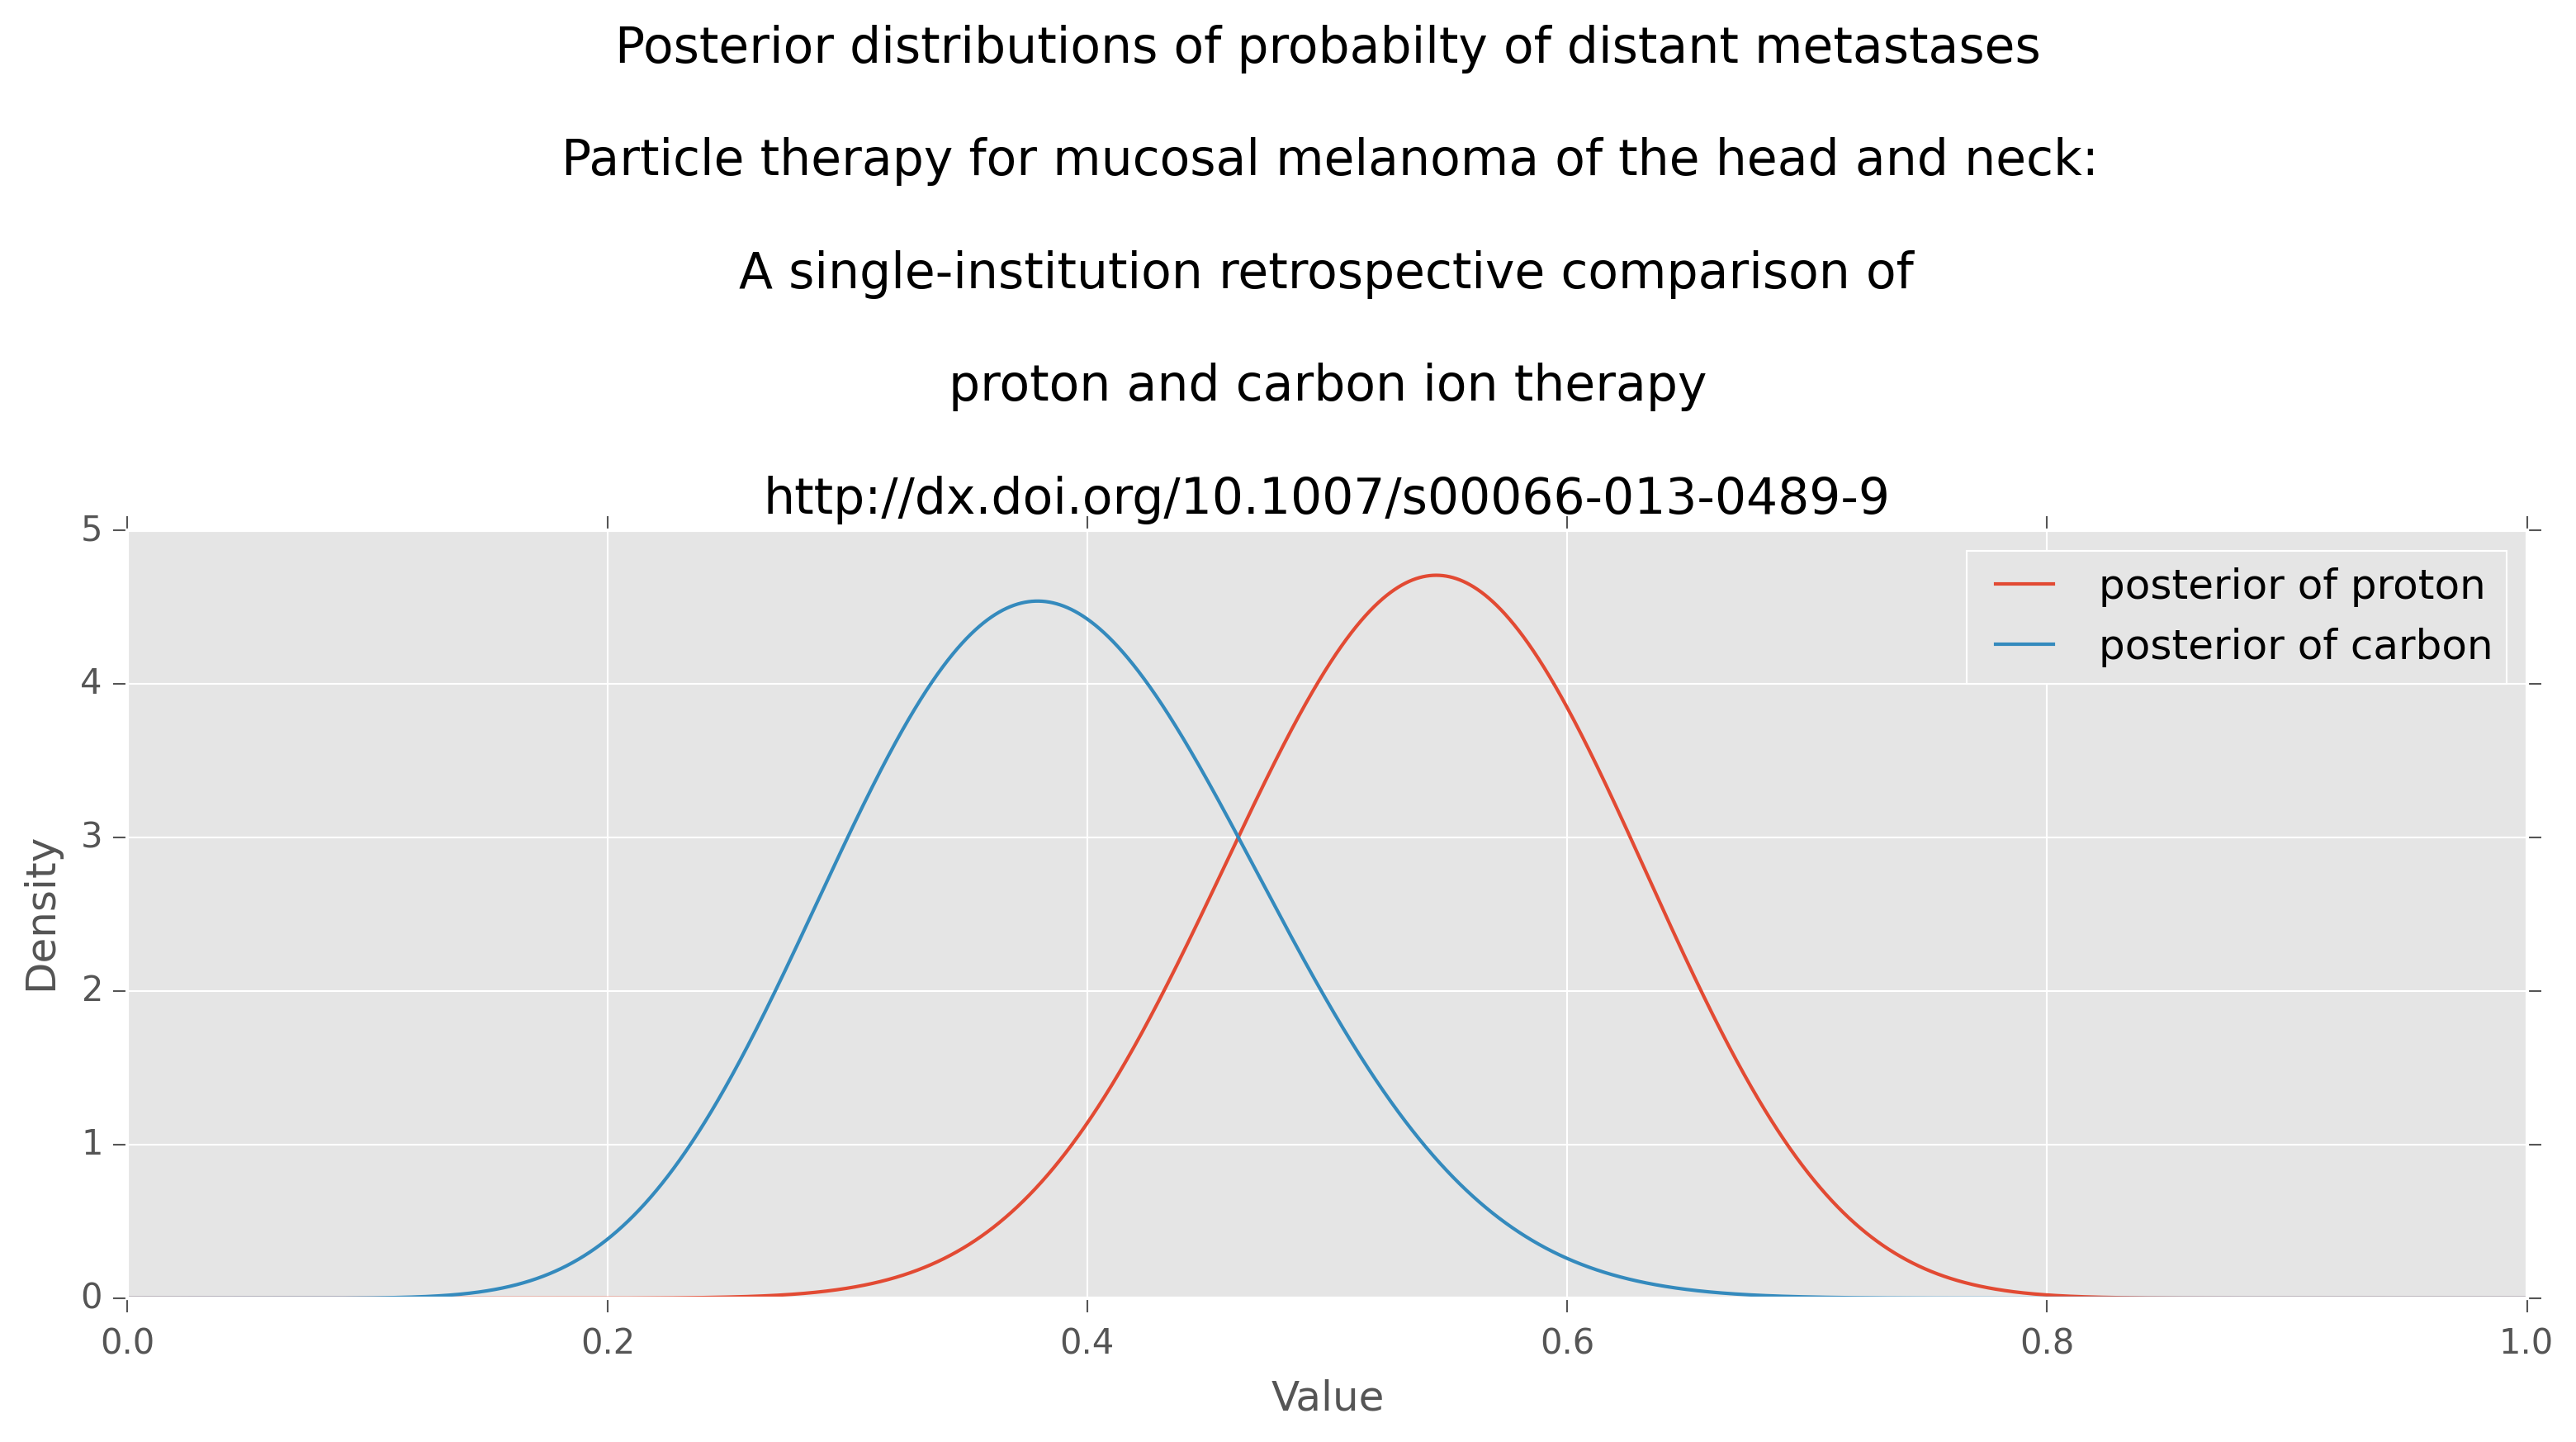

In [21]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
x = np.linspace(0,1, 50000)
plt.plot(x, posterior_proton.pdf(x), label='posterior of proton')
plt.plot(x, posterior_cit.pdf(x), label='posterior of carbon')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("""Posterior distributions of probabilty of distant metastases \n
Particle therapy for mucosal melanoma of the head and neck: \n
A single-institution retrospective comparison of \n
proton and carbon ion therapy \n 
http://dx.doi.org/10.1007/s00066-013-0489-9""")
plt.legend()
#plt.xlim(0.02,0.2)

In [22]:
PT_TOTAL = 33
CIT_TOTAL = 29

PT_TOX = 3
CIT_TOX = 2

from scipy.stats import beta
alpha_prior = 1
beta_prior = 1

posterior_proton = beta(alpha_prior + PT_TOX, beta_prior + PT_TOTAL - PT_TOX)

posterior_cit = beta(alpha_prior + CIT_TOX, beta_prior + CIT_TOTAL - CIT_TOX)


samples = 2000000

samples_posterior_proton = posterior_proton.rvs(samples)

samples_posterior_cit = posterior_cit.rvs(samples)

print (samples_posterior_cit > samples_posterior_proton).mean()

0.3981445


Can't really say anything about the relative probabilities to develop late toxicity

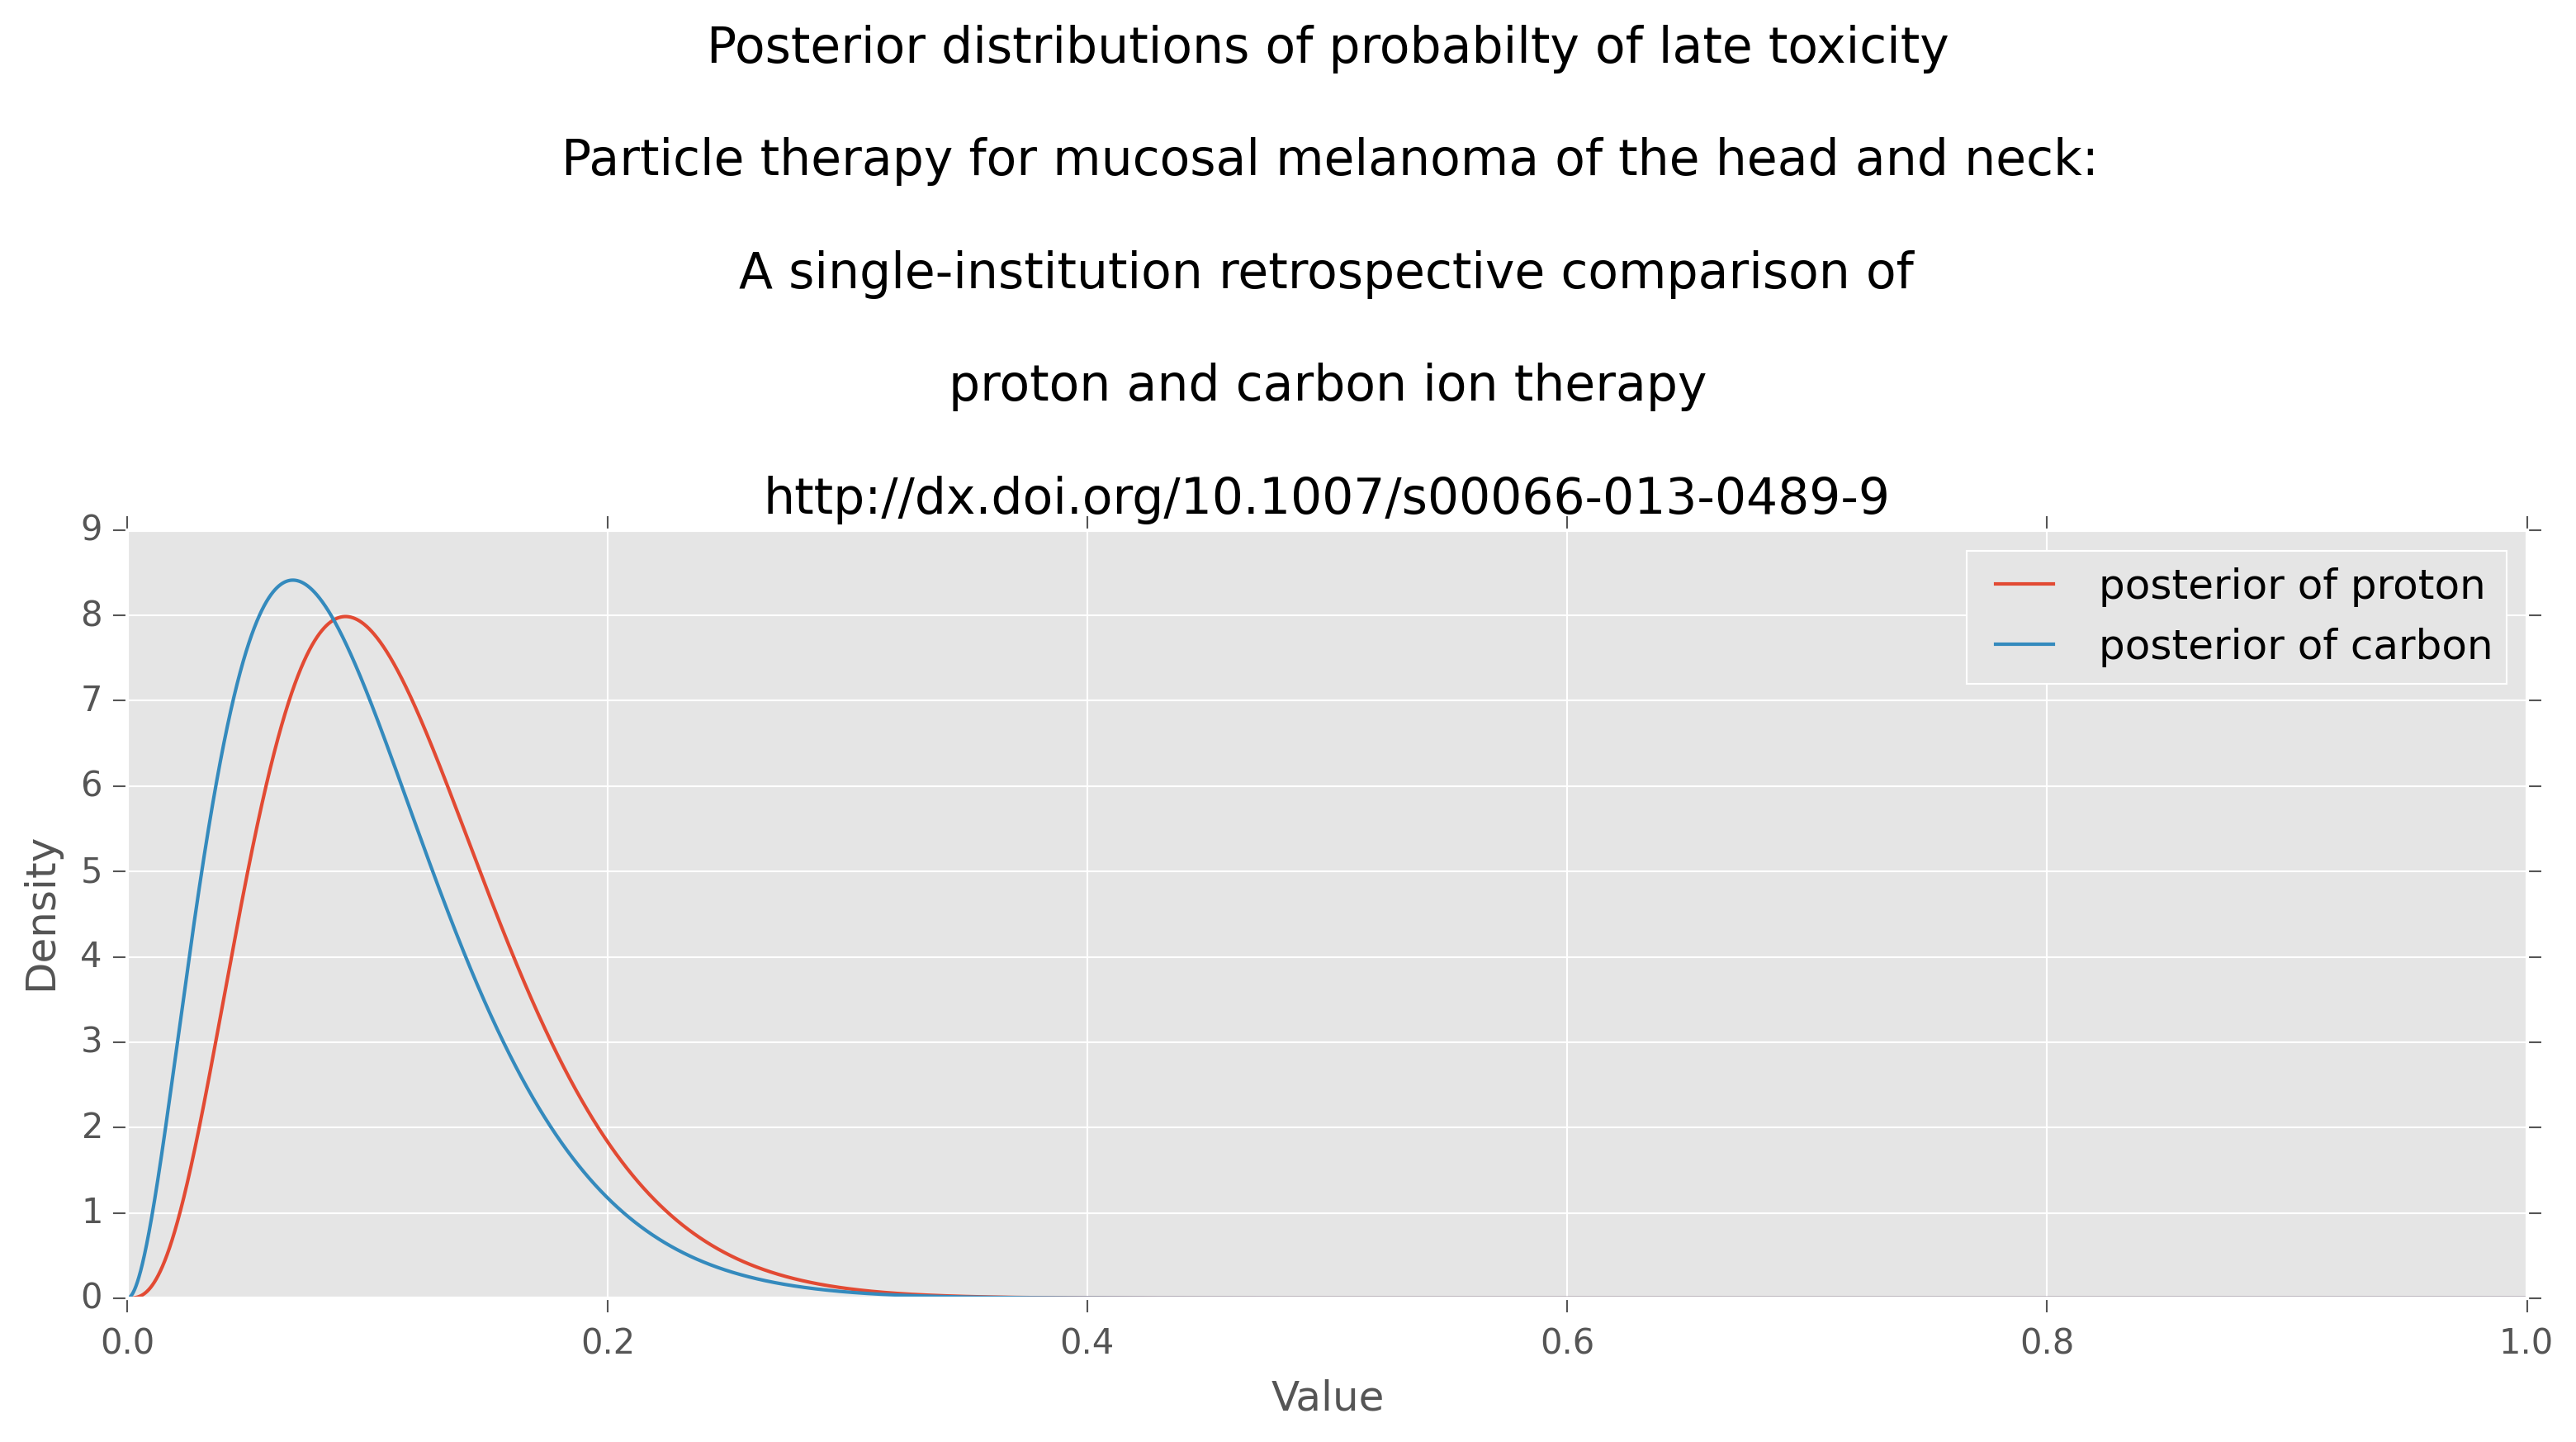

In [23]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
x = np.linspace(0,1, 50000)
plt.plot(x, posterior_proton.pdf(x), label='posterior of proton')
plt.plot(x, posterior_cit.pdf(x), label='posterior of carbon')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("""Posterior distributions of probabilty of late toxicity \n
Particle therapy for mucosal melanoma of the head and neck: \n
A single-institution retrospective comparison of \n
proton and carbon ion therapy \n 
http://dx.doi.org/10.1007/s00066-013-0489-9""")
plt.legend()
#plt.xlim(0.02,0.2)